## Exploratory Data Analysis

### Author: Rajiv Swamy
### Course: SML 312

## AirBnB Data Analysis: Austin, TX

In [1]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


Please visit the link below to see InsideAirbnb's data assumptions.

Data Assumptions:
http://insideairbnb.com/data-assumptions
- Location data is anaonymized and varies from actual location by up to 150 meters
- The price reflected in teh data represents the nightly price 

## Cleaning and Processing

The following Cleaning/EDA is conducted on the March 2022 Austin scrape from InsideAirbnb

In [2]:
folder_choice = './airbnb_data/austin/03-2022/'

In [3]:
# Data source paths
listings_path = './airbnb_data/austin/03-2022/listings.csv'

raw_list_df = pd.read_csv(listings_path)

pd.set_option('display.max_columns', 150) # To view all columns
pd.set_option('display.max_rows', 150)

raw_list_df.set_index('id', inplace=True)


# Future listings path, testing the merge to get future estimates nights booked
future_listings_path = './airbnb_data/austin/06-2022/listings.csv'

# extract number of reviews from future listing
raw_future_list = pd.read_csv(future_listings_path)
right = raw_future_list.set_index('id')['number_of_reviews']

merged = raw_list_df.join(right, how='inner',rsuffix='_future')


In [4]:
# Initial size of Marh listings file
raw_list_df.shape

(11972, 73)

In [5]:
# Initial size of June listings file
raw_future_list.shape

(17071, 74)

The March 2022 dataset contains 11972 listings and 74 columns

In [6]:
raw_list_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [7]:
raw_list_df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5456,https://www.airbnb.com/rooms/5456,20220312074014,2022-03-13,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Patio or balcony"", ""Hair dryer"", ""Security c...",$240.00,2,90,2.0,3.0,90.0,90.0,2.0,90.0,NaN,t,7,18,44,305,2022-03-13,585,42,5,2009-03-08,2022-03-07,4.83,4.87,4.85,4.89,4.81,4.73,4.78,NaN,f,1,1,0,0,3.69
5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",$42.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,NaN,t,0,0,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,4.90,4.90,4.86,4.91,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Austin, Texas, United States",78704,NaN,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Microwave"", ""Stove"", ""Shampoo"", ""...",$109.00,3,365,3

In [8]:
raw_list_df.isna().sum()

listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
description                                       164
neighborhood_overview                            4913
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           3
host_since                                          3
host_location                                      18
host_about                                       4679
host_response_time                               3449
host_response_rate                               3449
host_acceptance_rate                             2862
host_is_superhost                                   3
host_thumbnail_url                                  3
host_picture_url            

### Test textblob package on sample description input

In [6]:
desc = raw_list_df['description'].values.tolist()
desc[4]

"<b>The space</b><br />Fully furnished suite with kitchen, bathroom, breakfast counter, sitting area with sofa, and queen-sized bed.  Private patio entrance opens out onto large yard.  Stay close to downtown, SoCo, and artsy East Austin. This quiet neighborhood just off of Woodland Avenue has beautiful old oak trees, so it stays pleasant and shady through the summer.  Nearby city bus routes, so it is easy and inexpensive to get around, even if you don't have a car.  (Avoid the hassles of parking, too!)  Or rent a bike instead of a car.  Within easy reach of the airport.<br /><br />Stays of 2 weeks or more are $50/night.  Please ask and we can send a special offer with the reduced pricing.  <br /><br />Higher rates may apply during holidays, special events, depending on length of your stay.<br /><br />Please note, although there is a wireless internet connection, there is not a tv in the studio.<br /><br />Austin Short Term Rental License #085368"

In [7]:
b = TextBlob(desc[4])
b.sentiment[0]

# for num in range(10):
#     b = TextBlob(desc[num])
#     print(b.sentiment)

0.29514652014652015

## Test on Merged Data Processing

In [8]:
# Check number of listings that have no reviews from where the reviews per month is null
test = merged[merged['reviews_per_month'].isna()]
(test['number_of_reviews'] == 0).sum()

2261

Reviews_per_month is only null where there are 0 reviews

In [9]:
# Wherever there are no reviews
((merged['number_of_reviews'] == 0) & (merged['reviews_per_month'].isna())).sum()

2261

In [10]:
mask = ((merged['availability_365'] == 0) & (merged['number_of_reviews'] == 0))
mask.sum()

1029

Assumption: listings where there is 0 availability in the next year and currently have 0 reviews are 'inactive' listings

In [11]:
merged['delta_num_reviews'] = merged['number_of_reviews_future'] - merged['number_of_reviews'] 

# drop negative values, only keep non-negative deltas
merged = merged[merged['delta_num_reviews'] >= 0]

# Drop 'inactive' listings
mask = ((merged['availability_365'] == 0) & (merged['number_of_reviews'] == 0) & (merged['delta_num_reviews'] == 0))

merged.drop(merged[mask].index, inplace=True)

In [12]:
merged['delta_num_reviews'].value_counts()

0      3841
1       814
2       552
3       421
4       372
6       364
5       362
8       336
7       322
9       312
10      269
11      248
12      196
13      157
14      141
15      105
16       93
17       84
19       66
18       64
20       51
21       41
22       35
23       30
24       26
25       25
27       20
28       16
26       16
32       11
29       11
30       11
31       10
33        7
39        4
36        4
34        4
41        2
40        2
38        1
90        1
35        1
58        1
109       1
44        1
71        1
47        1
50        1
105       1
37        1
61        1
Name: delta_num_reviews, dtype: int64

In [13]:
merged.shape

(9457, 75)

## Cleaning and EDA on Primary Data (March 2022)

Text columns of future interest:
- neighborhood overview
- description
- Review data (separate csv file)
- host about
- amenities

In [14]:
# Drop extraneous metadata/columns not currently of interest
drop_cols = ['listing_url','scrape_id','last_scraped','name', 'neighborhood_overview', 'picture_url','host_url','host_name','host_location','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_about']
list_df = raw_list_df.drop(drop_cols, axis = 1)

In [15]:
list_df.shape

(11972, 59)

In [17]:
# Get number of null/missing items in each ccolumn
list_df.isna().sum()

description                                       164
host_id                                             0
host_since                                          3
host_response_time                               3449
host_response_rate                               3449
host_acceptance_rate                             2862
host_is_superhost                                   3
host_listings_count                                 3
host_total_listings_count                           3
host_has_profile_pic                                3
host_identity_verified                              3
neighbourhood                                    4913
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    11972
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

Initial observations: 
- columns with missing data for all rows: neighbourhood_group_cleansed, bathrooms, calendar_updated, license; these columns are dropped
- 'neighborhood' missing data for ~ 5k rows

In [18]:
drop_cols = ['neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood']
list_df.drop(drop_cols,axis=1, inplace=True)

In [19]:
list_df.head()

,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5456,Great central location for walking to Convent...,8028,2009-02-16,within an hour,100%,94%,t,1.0,1.0,t,t,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1 bath,1.0,2.0,"[""Patio or balcony"", ""Hair dryer"", ""Security c...",$240.00,2,90,2.0,3.0,90.0,90.0,2.0,90.0,t,7,18,44,305,2022-03-13,585,42,5,2009-03-08,2022-03-07,4.83,4.87,4.85,4.89,4.81,4.73,4.78,f,1,1,0,0,3.69
5769,<b>The space</b><br />Looking for a comfortabl...,8186,2009-02-19,NaN,NaN,100%,t,1.0,1.0,t,t,78729,30.45697,-97.78422,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",$42.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,t,0,0,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,4.90,4.90,4.86,4.91,4.94,4.74,4.92,f,1,0,1,0,1.81
6413,"Great studio apartment, perfect a single perso...",13879,2009-04-17,within an hour,100%,100%,t,1.0,1.0,t,t,78704,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,"[""Kitchen"", ""Microwave"", ""Stove"", ""Shampoo"", ""...",$109.00,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,0,0,0,0,2022-03-31,117,2,0,2009-12-14,2021-07-01,4.97,4.99,4.99,4.99,4.98,4.86,4.94,t,1,1,0,0,0.78
6448,"Clean, private space with everything you need ...",14156,2009-04-20,within an hour,100%,98%,t,2.0,2.0,t,t,78704,30.26034,-97.76487,Entire guesthouse,Entire home/apt,3,1 bath,1.0,2.0,"[""Toaster"", ""Ceiling fan"", ""Outlet covers"", ""C...",$325.00,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,9,19,39,107,2022-03-12,268,30,3,2011-09-06,2022-03-06,4.97,4.97,4.96,4.99,4.97,4.97,4.89,t,1,1,0,0,2.09
8502,<b>The space</b><br />Fully furnished suite wi...,25298,2009-07-11,within a day,83%,29%,f,1.0,1.0,t,f,78741,30.23466,-97.73682,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,"[""Essentials"", ""Kitchen"", ""Host greets you"", ""...",$44.00,3,90,3.0,4.0,90.0,90.0,3.4,90.0,t,0,0,26,26,2022-03-13,48,2,0,2010-02-19,2021-11-13,4.53,4.49,4.67,4.83,4.86,4.64,4.57,f,1,1,0,0,0.33


### Add sentiment to the `description` column

In [102]:
# first fill all nan/null values to empty string
list_df['description'].fillna('',inplace=True)

list_df['description_sentiment'] = list_df['description'].apply(lambda desc: TextBlob(desc).sentiment[0])

list_df.drop('description',axis=1,inplace=True)

### Price: convert currency string into float value

In [103]:
from re import sub
from decimal import Decimal

# Adapted from https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
list_df['price'] = list_df['price'].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

Exploring difference between `host_listings_count`, `host_total_listings_count`, `calculated_host_listings_count`
From data dictionary:
- `host_listings_count`: The number of listings the host has (per Airbnb calculations)
- `host_total_listings_count`: same as above
- `calculated_host_listings_count`: The number of listings the host has in the current scrape, in the city/region geography.

In [104]:
list_df[['host_listings_count','host_total_listings_count','calculated_host_listings_count']]

,host_listings_count,host_total_listings_count,calculated_host_listings_count
id,,,
5456,1.0,1.0,1
5769,1.0,1.0,1
6413,1.0,1.0,1
6448,2.0,2.0,1
8502,1.0,1.0,1
...,...,...,...
580462092672410996,679.0,679.0,194
580582279500909804,679.0,679.0,194
580584759307470623,679.0,679.0,194


In [105]:
list_df[list_df['host_listings_count'].isna()]

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,description_sentiment
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4117663,21362514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78704,30.25261,-97.74740,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,"[""Free parking on premises"", ""Essentials"", ""Sm...",400.0,2,3,2.0,2.0,3.0,3.0,2.0,3.0,f,0,0,0,0,2022-03-31,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,0.145833
4356661,21791967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78704,30.25492,-97.74532,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Long term stays al...",75.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,f,0,0,0,0,2022-03-31,1,0,0,2015-08-13,2015-08-13,0.00,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.01,0.227778
8214182,21556779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78741,30.22839,-97.72529,Private room in rental unit,Private room,1,1 bath,1.0,1.0,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Kitc...",27.0,1,5,1.0,1.0,5.0,5.0,1.0,5.0,t,0,0,0,0,2022-03-31,4,0,0,2015-09-07,2015-09-24,4.67,4.67,4.33,5.0,5.0,5.0,5.0,f,1,0,1,0,0.05,0.100000


In [106]:
(list_df['host_listings_count'] == list_df['host_total_listings_count']).sum()

11969

Hostlistingscount and hosttotallistingscount have the same data. These columns do differ with the calculated host listings count for ~7k listings in the dataset

In [107]:
list_df[list_df['host_listings_count'] != list_df['calculated_host_listings_count']].shape

(6974, 54)

In [108]:
# drop the 'host_listings_count' column
list_df.drop('host_listings_count', axis=1, inplace=True)

In [109]:
list_df.isna().sum()

host_id                                            0
host_since                                         3
host_response_time                              3449
host_response_rate                              3449
host_acceptance_rate                            2862
host_is_superhost                                  3
host_total_listings_count                          3
host_has_profile_pic                               3
host_identity_verified                             3
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    16
bedrooms                                         711
beds                                             150
amenities                                     

Seems that `calculated_host_listings_count` has clean data for all rows and also focuses on the listings for hosts in the Austin area.

In [29]:
# Get number of unique zip codes in the cleansed neighbourhood column
list_df['neighbourhood_cleansed'].value_counts()

78704    1901
78702    1499
78701     878
78741     779
78745     566
78703     521
78705     494
78751     469
78758     468
78723     382
78734     287
78721     277
78746     263
78744     235
78757     212
78722     194
78752     188
78748     185
78756     155
78754     155
78737     154
78731     148
78759     142
78753     132
78727     128
78729     127
78749     118
78728     109
78724     109
78735      89
78733      79
78732      71
78747      67
78736      65
78717      61
78738      58
78750      52
78725      50
78730      39
78739      31
78726      14
78742      11
78719       9
78712       1
Name: neighbourhood_cleansed, dtype: int64

Columns dealing with listing location include:
- neighbourhood_cleansed, lat, lon

`neighbourhood_cleansed` seems to be 5 digit zip codes encoded as ints, no missing data for this column, there seems to be ~44 unique zip codes 

We also want to binarize the true false values in the data set


In [20]:
# replace true false values to be 0/1 encoded
list_df.replace({'f': 0, 't': 1}, inplace=True)
# drop rows where bathroom or bedroom data is missing
list_df.dropna(subset=['bathrooms_text','bedrooms'], inplace=True)

#### extract float values from `bathrooms_text` feature

In [31]:
# view unique values for the bathrooms_text feature, only 38 unique values
val_counts_bath = list_df['bathrooms_text'].value_counts().index.values.tolist()

# Create dict to convert strings to appropriate numerical quantity
bath_conversion = {
    'Half-bath': 0.5,
    'Shared half-bath': 1,
    'Private half-bath': 0.5,
}

# Helper function to use in apply operation
def get_bath(val):
    first_token = val.split(' ')[0]

    if first_token.isnumeric():
        return float(first_token)
    elif val in bath_conversion.keys():
        return bath_conversion[val]
    else:
        return 1
    
# Extract the number of baths in the dataset
list_df['bathrooms_text'] = list_df['bathrooms_text'].apply(get_bath)
list_df.rename(columns={'bathrooms_text':'bathrooms'}, inplace=True)

#### extract percentage float values from `host_response_rate` and `host_acceptance_rate` features

In [32]:
# Convert host resopnse and acceptance rate into numerical values
list_df['host_response_rate'] = list_df['host_response_rate'].str.rstrip('%').astype('float')
list_df['host_acceptance_rate'] = list_df['host_acceptance_rate'].str.rstrip('%').astype('float')

In [33]:
# list all cols
vals = list_df.columns.values.tolist()
# for col in vals:
#     print('- ' + '`'+col+'`')

Explore rows where reviews per month is null or number of reviews is null, possibly try to grab inactive listings, in the merged dataframe

In [35]:
# Check number of listings that have no reviews from where the reviews per month is null
test = merged[merged['reviews_per_month'].isna()]
(test['number_of_reviews'] == 0).sum()

1237

In [36]:
# Wherever there are no reviews
((merged['number_of_reviews'] == 0) & (merged['reviews_per_month'].isna())).sum()

1237

In [37]:
# Number of listings that have no availability for the upcoming year
(raw_list_df['availability_365'] == 0).sum()

3371

In [38]:
((raw_list_df['availability_365'] == 0) & (raw_list_df['number_of_reviews'] == 0)).sum()

1063

In [39]:
# Exploring the values where 
raw_list_df[raw_list_df['availability_365'] == 0]

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78729,NaN,30.456970,-97.784220,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",$42.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,NaN,t,0,0,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,4.90,4.90,4.86,4.91,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Austin, Texas, United States",78704,NaN,30.248850,-97.735870,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Microwave"", ""Stove"", ""Shampoo"", ""...",$109.00,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2022-03-31,117,2,0,2009-12-14,2021-07-01,4.97,4.99,4.99,4.99,4.98,4.86,4.94,NaN,t,1,1,0,0,0.78
69810,https://www.airbnb.com/rooms/69810,20220312074014,2022-03-31,"Live Beneath Live Oaks in a Bright, Intimate H...",Curl up with a book on the comfy window seat o...,"Located in the cool Dawson area, about two mil...",https://a0.muscache.com/pictures/29e0c726-e6d5...,82762,https://www.airbnb.com/users/show/82762,Dolina,2010-02-18,"Austin, Texas, United States",My husband and I spent a year traveling the wo...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/82762/profile...,https://a0.muscache.com/im/users/82762/profile...,Dawson,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78704,NaN,30.230900,-97.766190,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Backy

## Cleaning Columns Individually

Inspired and adapted from related work (https://nbviewer.org/github/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb#Cleaning-and-pre-processing)

### `host_since`

In [40]:
from datetime import datetime

# Convert to datetime
list_df['host_since'] = pd.to_datetime(list_df['host_since'])

# Date of data scrape, unique to each dataset
date_of_scrape = datetime(2022,3,12)

list_df['host_days_active'] = (date_of_scrape - list_df.host_since).astype('timedelta64[D]')

# get mean values of host acctiveness in austin
# Printing mean and median
print("Mean days as host:", round(list_df['host_days_active'].mean(),0))
print("Median days as host:", list_df['host_days_active'].median())

# replace missing values with the median
list_df['host_days_active'].fillna(list_df.host_days_active.median(), inplace=True)

Mean days as host: 2154.0
Median days as host: 2215.0


### `host_response_time`

About 28% of the listings do not have a value for host_response time. Good 1/3 portion of these null rows also do not have review data. 

#### Airbnb Website (https://www.airbnb.com/help/article/430)
response_time: Your response time is the average amount of time that it took for you to respond to all new messages in the past 30 days.

response_rate: Your response rate is the percentage of new inquiries and reservation requests you responded to (by either accepting/pre-approving or declining) within 24 hours in the past 30 days.


Specution: these listings are possibly 'inactive' listings, calendars closed or have prices notably higher than others in area. --> retain null rows with unknown label

Possible next step:
--> replace with mode label

In [41]:
list_df.host_response_time.value_counts()

within an hour        6437
within a few hours     910
within a day           578
a few days or more     115
Name: host_response_time, dtype: int64

In [42]:
null_num = list_df.host_response_time.isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))

# Number of rows without a value for host_response_time which have also not yet had a review
len(list_df[list_df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])


Null values: 3207
Proportion Null:  0.285142704721259


1095

In [43]:
# Replace null vals with unknown label
list_df.host_response_time.fillna("unknown", inplace=True)
list_df.host_response_time.value_counts(normalize=True)

within an hour        0.572330
unknown               0.285143
within a few hours    0.080910
within a day          0.051391
a few days or more    0.010225
Name: host_response_time, dtype: float64

### `host_response_rate`
First check the null values, same num rows null as host_response_time

Solution: bin into categories and replacce nulls with 'unknown' label

In [44]:
null_num = list_df['host_response_rate'].isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))


Null values: 3207
Proportion Null:  0.285142704721259


In [45]:
# Bin into four categories
list_df['host_response_rate_bins'] = pd.cut(list_df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
list_df.host_response_rate_bins = list_df.host_response_rate_bins.astype('str')

# Replace nulls with 'unknown'
list_df.host_response_rate_bins.replace('nan', 'unknown', inplace=True)

# Category counts
list_df.host_response_rate_bins.value_counts()

100%       6403
unknown    3207
90-99%      804
50-89%      678
0-49%       155
Name: host_response_rate_bins, dtype: int64

### `host_acceptance_rate`

In [46]:
null_num = list_df['host_acceptance_rate'].isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))

Null values: 2647
Proportion Null:  0.2353516493287099


In [47]:
# Bin into four categories
list_df['host_acceptance_rate_bins'] = pd.cut(list_df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
list_df.host_acceptance_rate_bins = list_df.host_response_rate_bins.astype('str')

# Replace nulls with 'unknown'
list_df.host_acceptance_rate_bins.replace('nan', 'unknown', inplace=True)

# Category counts
list_df.host_acceptance_rate_bins.value_counts()

100%       6403
unknown    3207
90-99%      804
50-89%      678
0-49%       155
Name: host_acceptance_rate_bins, dtype: int64

### `host_is_superhost`

Only 3/11k rows in the dataset lack value for this feature

Solution: drop these rows

In [48]:
list_df['host_is_superhost'].value_counts(dropna=False)

0.0    7650
1.0    3594
NaN       3
Name: host_is_superhost, dtype: int64

In [49]:
# Drop rows
list_df.dropna(subset=['host_since'], inplace=True)


### `property_type`

Lots of different values here, basically try to get differentiation between types like home, apartment, condo

In [50]:
# list the different property types
# list_df.property_type.value_counts()

In [51]:
# Helper function to get property type given the names
def process_prop_type(val):
    home_list = ['home', 'townhouse', 'residential','bungalow','cottage','villa','chalet', 'Tiny house','guesthouse']
    rental_unit_list = ['rental unit', 'apartment','loft']
    condo_list = ['condominium', 'condo']

    prop_types = {'Home': home_list,
                  'Apartment':rental_unit_list,
                  'Condo':condo_list,}
    
    for prop, names in prop_types.items():
        for name in names:
            if name in val:
                return prop
    
    return "Other"

list_df['property_type_clean'] = list_df['property_type'].apply(process_prop_type)


In [52]:
list_df['property_type_clean'].value_counts()

Home         6424
Apartment    3123
Condo        1130
Other         567
Name: property_type_clean, dtype: int64

### `bathrooms`, `bedrooms`, `beds`

Change missing values for these features to the median value

In [53]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    list_df[col].fillna(list_df[col].median(), inplace=True)

### `amenities`

Detailed lists of additonal things in the property, think TV/wi-fi; save for later

In [54]:
list_df.amenities.values.tolist()[0]

'["Patio or balcony", "Hair dryer", "Security cameras on property", "Dishes and silverware", "Microwave", "Coffee maker", "TV", "Hangers", "Private entrance", "Heating", "Bed linens", "Extra pillows and blankets", "Wifi", "Shampoo", "Keypad", "Kitchen", "Iron", "Air conditioning", "Essentials", "Backyard", "Long term stays allowed", "Hot water", "Refrigerator", "Free street parking", "Luggage dropoff allowed", "Smoke alarm"]'

In [55]:
from collections import Counter

# Creating a set of all possible amenities
amenities_rows = list(list_df.amenities)
amenities_rows = [row.replace('[','').replace(']','').replace('"','') for row in amenities_rows]
all_amenities_list_string = ",".join(amenities_rows)
all_amenites = [amen.strip() for amen in all_amenities_list_string.split(',')]

# Use counter to get unique values and store their counts as well
amenities = list(Counter(all_amenites).keys())
counts = list(Counter(all_amenites).values())

In [56]:
# Get values sorted
srt = sorted(list(zip(counts,amenities)), reverse=True)

Store the output of the amenities list in a json file for further analysis.

In [57]:
import json

file_path = folder_choice + 'amenities.json'

with open(file_path, "w") as outfile:
    json.dump(srt, outfile, indent=4)
type(srt)

list

In [58]:
# Amenities with more than 10k occurences in dataset
gt_10k = [pair for pair in srt if pair[0] > 10000]
gt_10k

[(10724, 'Wifi'),
 (10624, 'Smoke alarm'),
 (10399, 'Kitchen'),
 (10061, 'Air conditioning')]

In [59]:
# Amenities with less than 10k, greater than 7k occurences in dataset
bet_7k_10k = [pair for pair in srt if pair[0] <= 10000 and pair[0] > 6000]
bet_7k_10k

[(9935, 'Essentials'),
 (9036, 'Long term stays allowed'),
 (8812, 'Free parking on premises'),
 (8456, 'Heating'),
 (8411, 'Hangers'),
 (8408, 'Washer'),
 (8310, 'Hair dryer'),
 (8268, 'Shampoo'),
 (8236, 'Carbon monoxide alarm'),
 (8058, 'Iron'),
 (7726, 'Fire extinguisher'),
 (7436, 'Hot water'),
 (7306, 'Dryer'),
 (7107, 'Dedicated workspace'),
 (7056, 'TV'),
 (7020, 'Dishes and silverware'),
 (6997, 'Coffee maker'),
 (6738, 'Refrigerator'),
 (6672, 'Microwave'),
 (6660, 'Cooking basics'),
 (6069, 'Bed linens')]

Analysis:
It seems that amenities like Wifi, Smoke alarm, Kitchen, and Air conditioning are ubiquitous among the listings. Since Wifi and these features are so common among listings, they will not help differentiate the listings. 

Other important amenities include:
- TV/Entertainment Electronics: "TV", "TV with standard cable", "HDTV with Amazon Prime Video", "Amazon Prime Video", "HDTV", "HDTV with Netflix", "TV with Roku"
"TV with Netflix", "TV with Amazon Prime Video", "HDTV"
- Air conditioning
- BBQ Grill, accessories
- Patio
- Pool, hot tub
- Cooking basics
- Security camera
- Parking

Extract features from the amenities column and store it in the main dataframe

In [60]:
tv_list = ["TV", "TV with standard cable", "HDTV with Amazon Prime Video", "Amazon Prime Video", "HDTV", "HDTV with Netflix", "TV with Roku", "TV with Netflix", "TV with Amazon Prime Video", "HDTV"]
parking_list = ["Free parking on premises", "Free street parking", "Free driveway parking on premises", "Free parking"]

list_df['amenities_TV'] = list_df['amenities'].str.contains('|'.join(tv_list)).replace({True: 1, False: 0})
list_df['amenities_cooking'] = list_df['amenities'].str.contains('Cooking basics').replace({True: 1, False: 0})
list_df['amenities_bathtub'] = list_df['amenities'].str.contains('Bathtub').replace({True: 1, False: 0})
list_df['amenities_security_cameras'] = list_df['amenities'].str.contains('Security cameras').replace({True: 1, False: 0})
list_df['amenities_laundry'] = list_df['amenities'].str.contains('Washer|Dryer').replace({True: 1, False: 0})
list_df['amenities_parking'] = list_df['amenities'].str.contains('|'.join(parking_list)).replace({True: 1, False: 0})
list_df['amenities_bbq'] = list_df['amenities'].str.contains('BBQ grill').replace({True: 1, False: 0})
list_df['amenities_luggage_dropoff'] = list_df['amenities'].str.contains("Luggage dropoff allowed").replace({True: 1, False: 0})
list_df['amenities_pool_hot_tub'] = list_df['amenities'].str.contains("Pool|pool|Hot tub|hot tub").replace({True: 1, False: 0})


### `minimum_nights`, `maximum_nights`
There are eight columns relating to the min num and max num of night stay


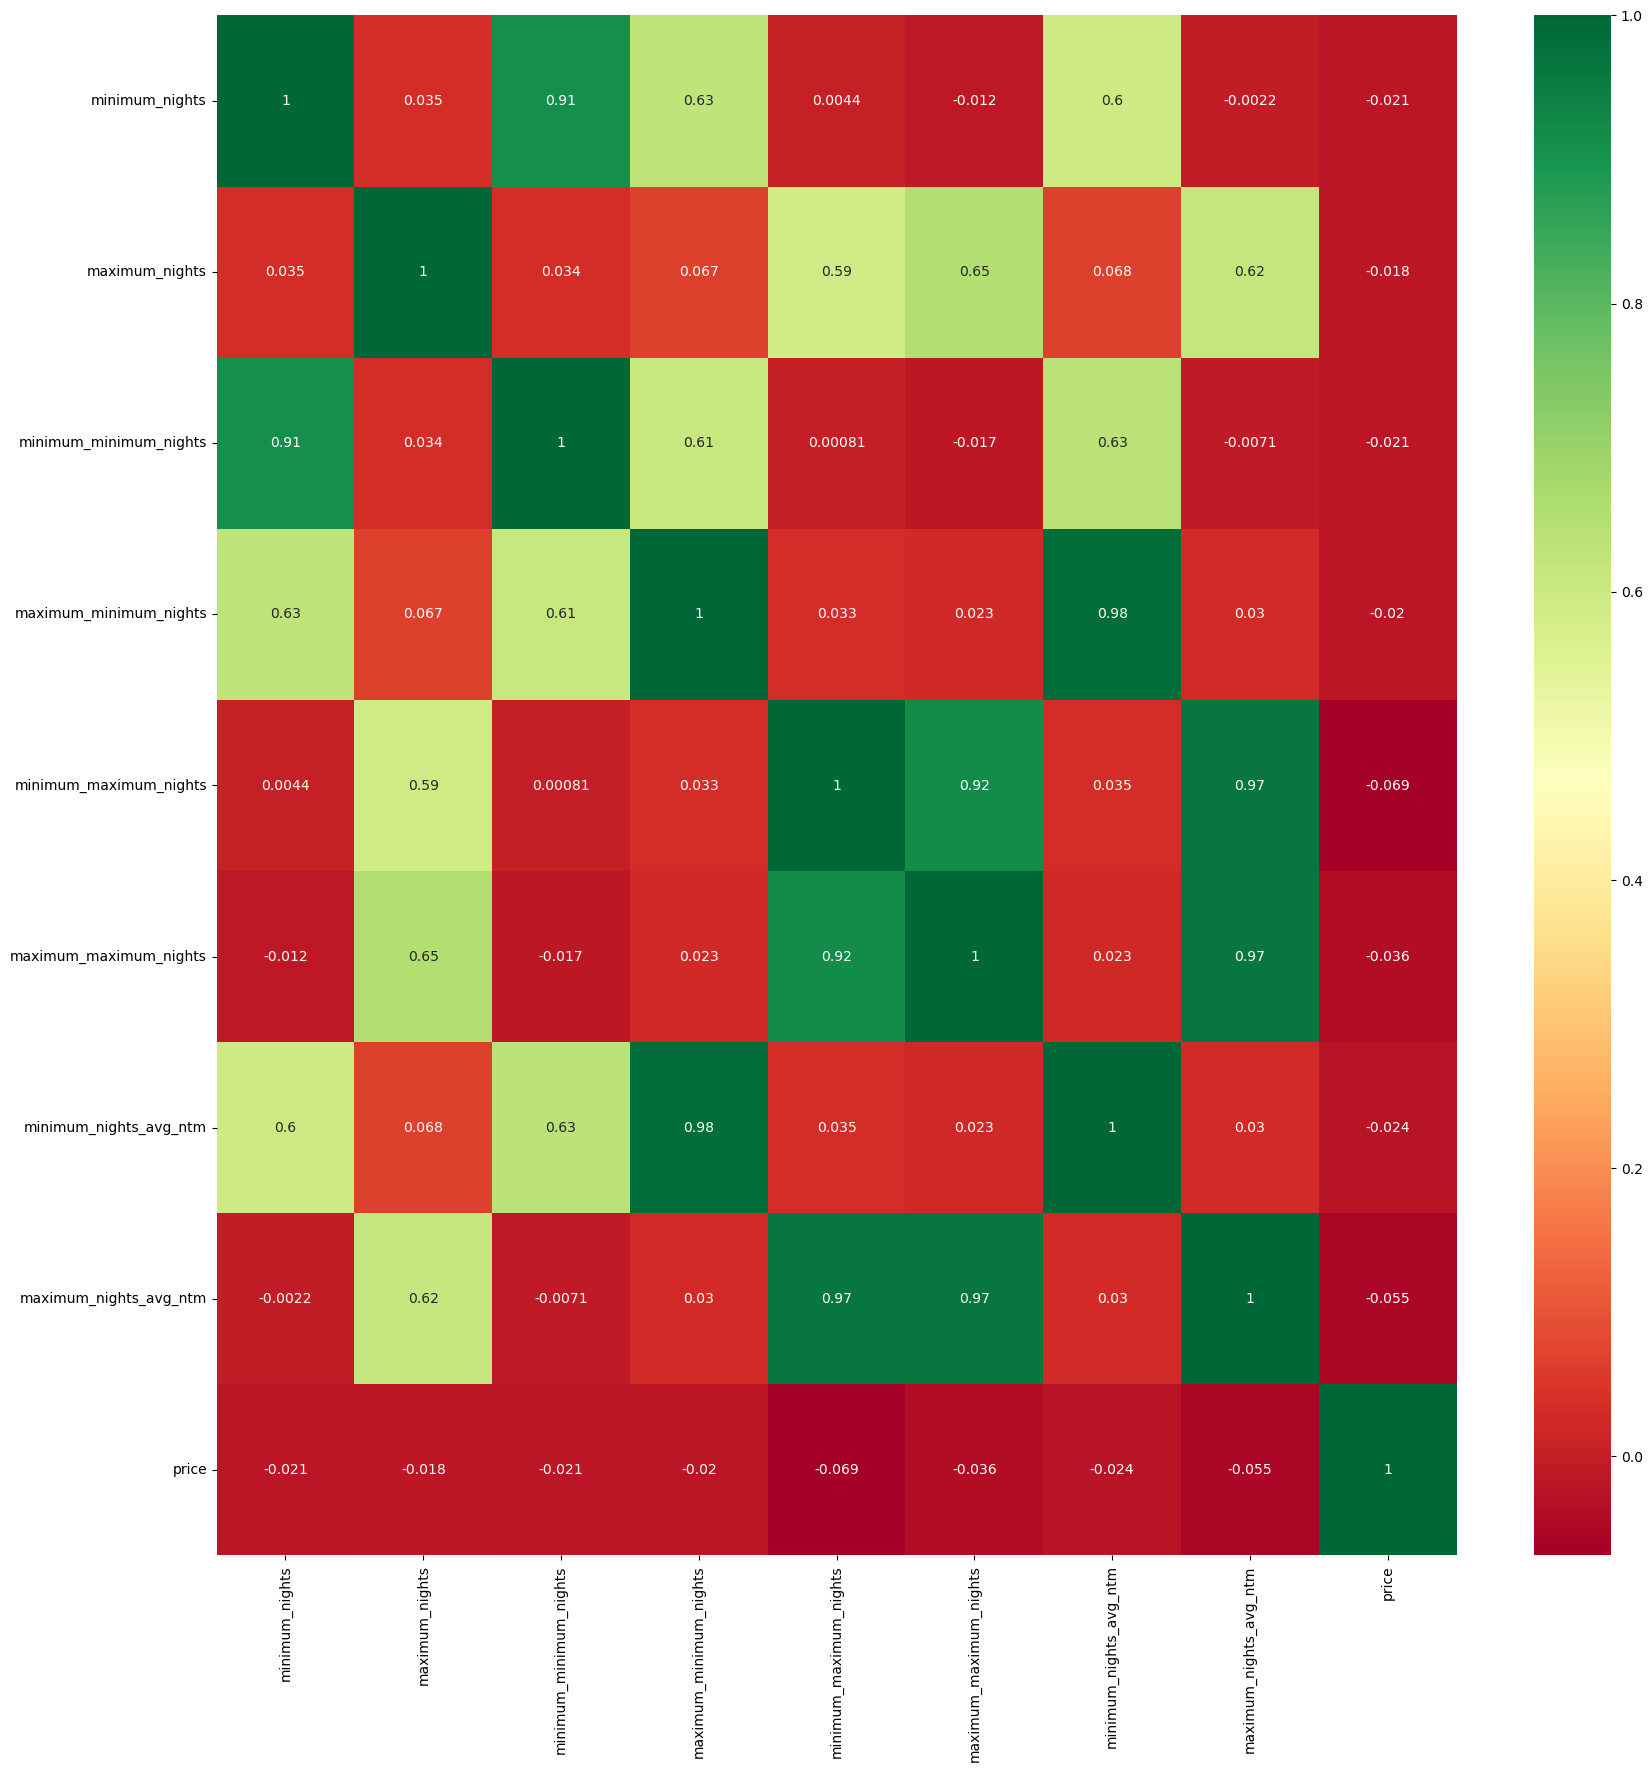

In [61]:
cols = ['minimum_nights','maximum_nights',
        'minimum_minimum_nights','maximum_minimum_nights',
        'minimum_maximum_nights','maximum_maximum_nights',
        'minimum_nights_avg_ntm','maximum_nights_avg_ntm','price']
df_int = list_df[cols]

# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [62]:
# Drop columns that are tightly related
list_df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 
                'minimum_maximum_nights', 'maximum_maximum_nights'], axis=1, inplace=True)

Missing values: replace with median value

### `Availability columns`

Notice that the availability. Decision, drop 60 and 90 because those are the most closely related to each other.

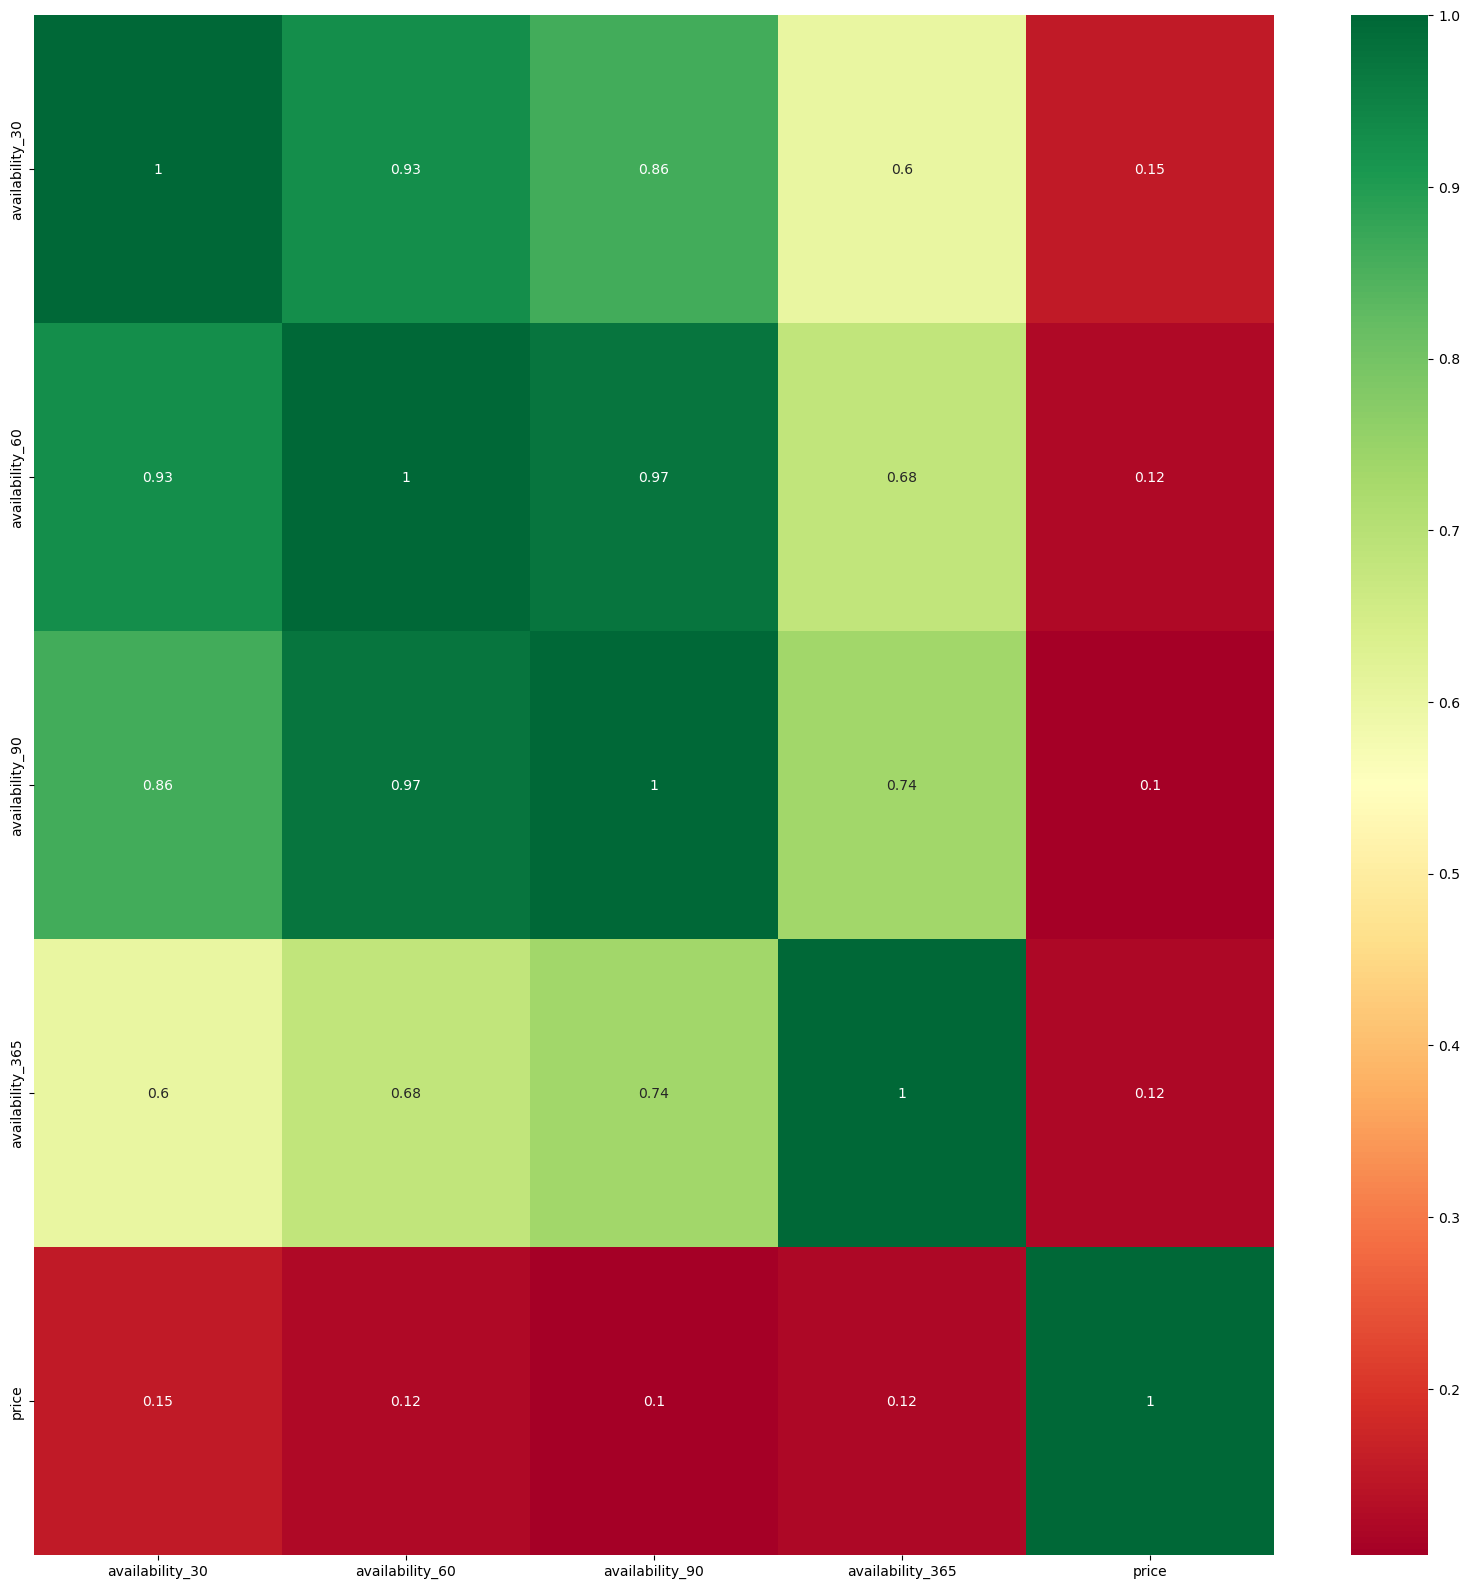

In [63]:
cols = ['availability_30','availability_60','availability_90','availability_365','price']

list_df.groupby(['has_availability'])['price'].mean()

df_int = list_df[cols]
# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()


In [64]:
list_df.drop(['availability_60', 'availability_365'], axis=1, inplace=True)

### `first_review`,  `last_review`



In [65]:
print(f"Null values in 'first_review': {round(100*list_df.first_review.isna().sum()/len(list_df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*list_df.review_scores_rating .isna().sum()/len(list_df),1)}%")

Null values in 'first_review': 25.1%
Null values in 'review_scores_rating': 25.1%


In [66]:
list_df.first_review = pd.to_datetime(list_df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
list_df['time_since_first_review'] = (date_of_scrape - list_df.first_review).astype('timedelta64[D]')

<AxesSubplot: >

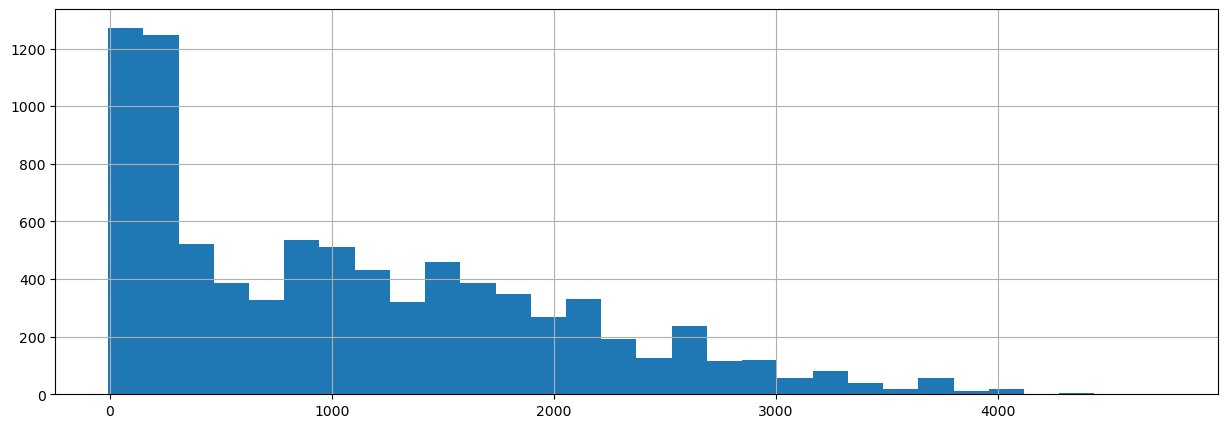

In [67]:
# Plot days since first review
list_df.time_since_first_review.hist(figsize=(15,5), bins=30)

In [68]:
def bin_column(df, col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].replace('nan', na_label, inplace=True)
    df[col].fillna(na_label, inplace=True)

In [69]:
# Binning time since first review
bin_column(list_df, 'time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(list_df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

Repeat same process for `last review`

<AxesSubplot: >

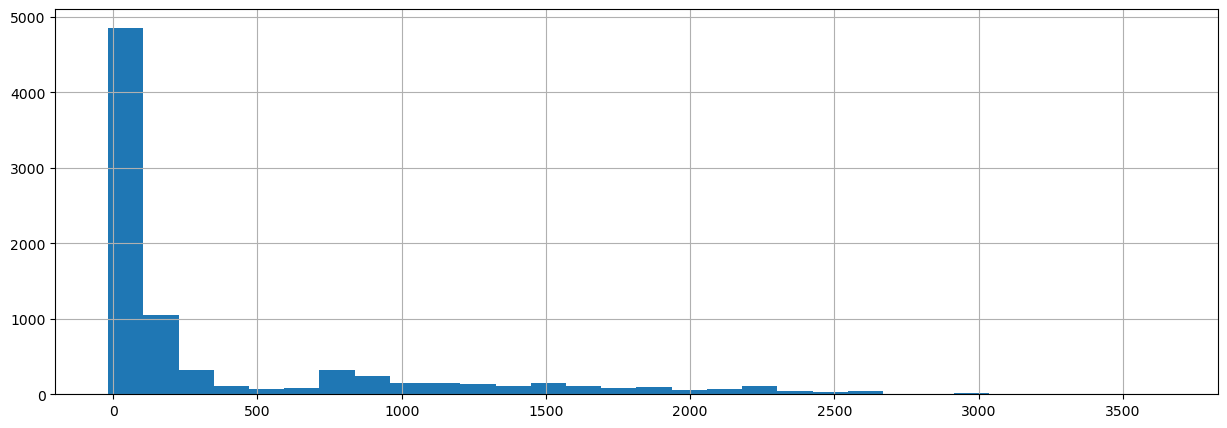

In [70]:
list_df.last_review = pd.to_datetime(list_df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
list_df['time_since_last_review'] = (date_of_scrape - list_df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
list_df.time_since_last_review.hist(figsize=(15,5), bins=30)

In [71]:
# Binning these columns in a siilar manner
bin_column(list_df, 'time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(list_df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [72]:
list_df['time_since_last_review'].value_counts()

no reviews     2905
0-2 weeks      2393
1+ year        2176
2-8 weeks      1729
2-6 months     1530
6-12 months     511
Name: time_since_last_review, dtype: int64

## `review` ratings features

Many listings don't have review data and should be kept, the raw values are decently correlated, rendering some multi-collinearity

In [73]:
variables_to_plot = list(list_df.columns[list_df.columns.str.startswith("review_scores") == True])

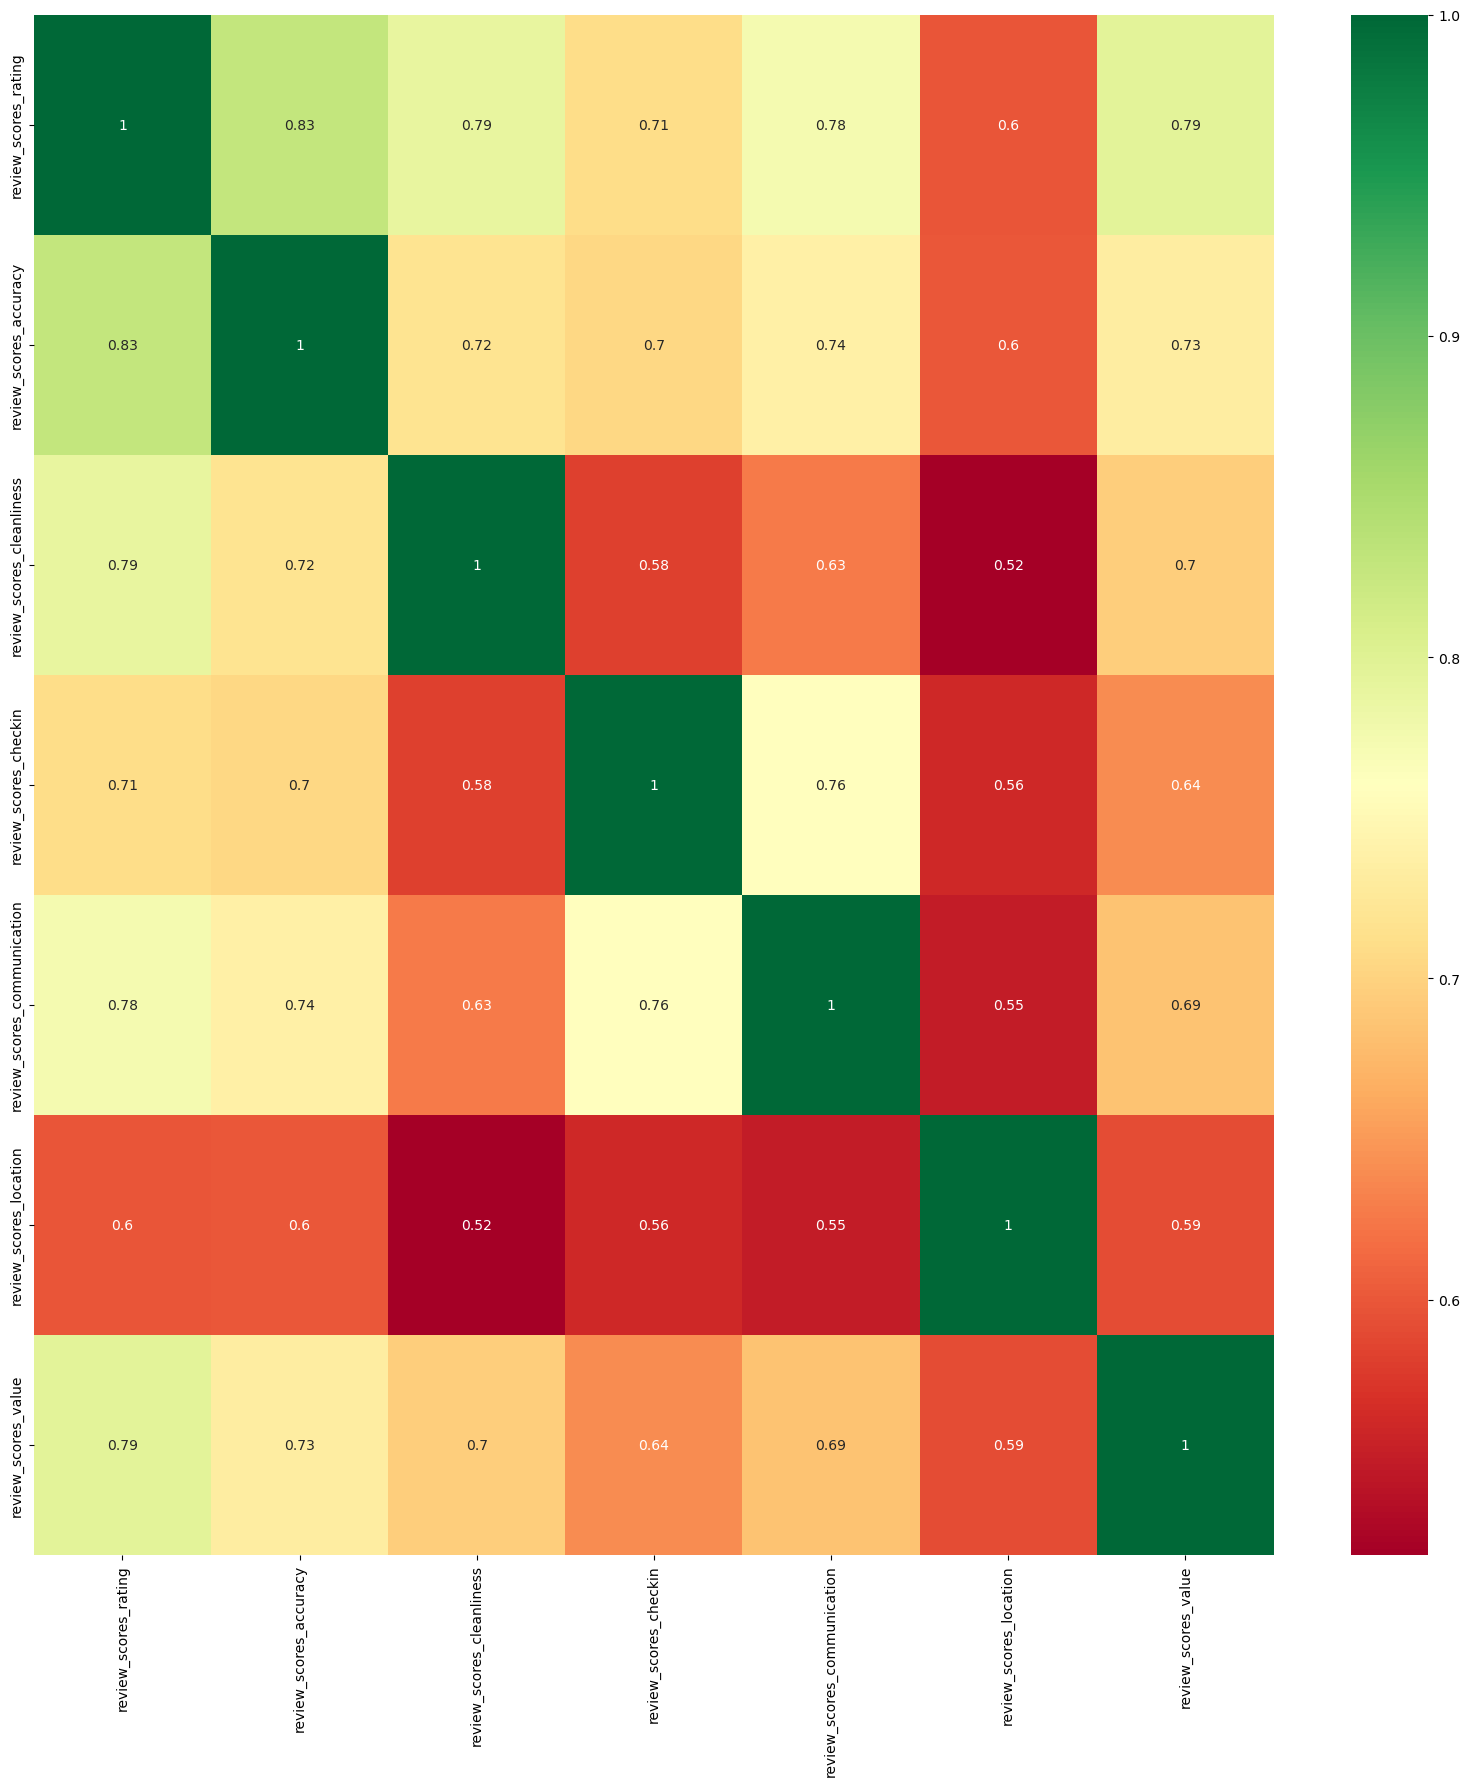

In [74]:
correlation = list_df[variables_to_plot].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

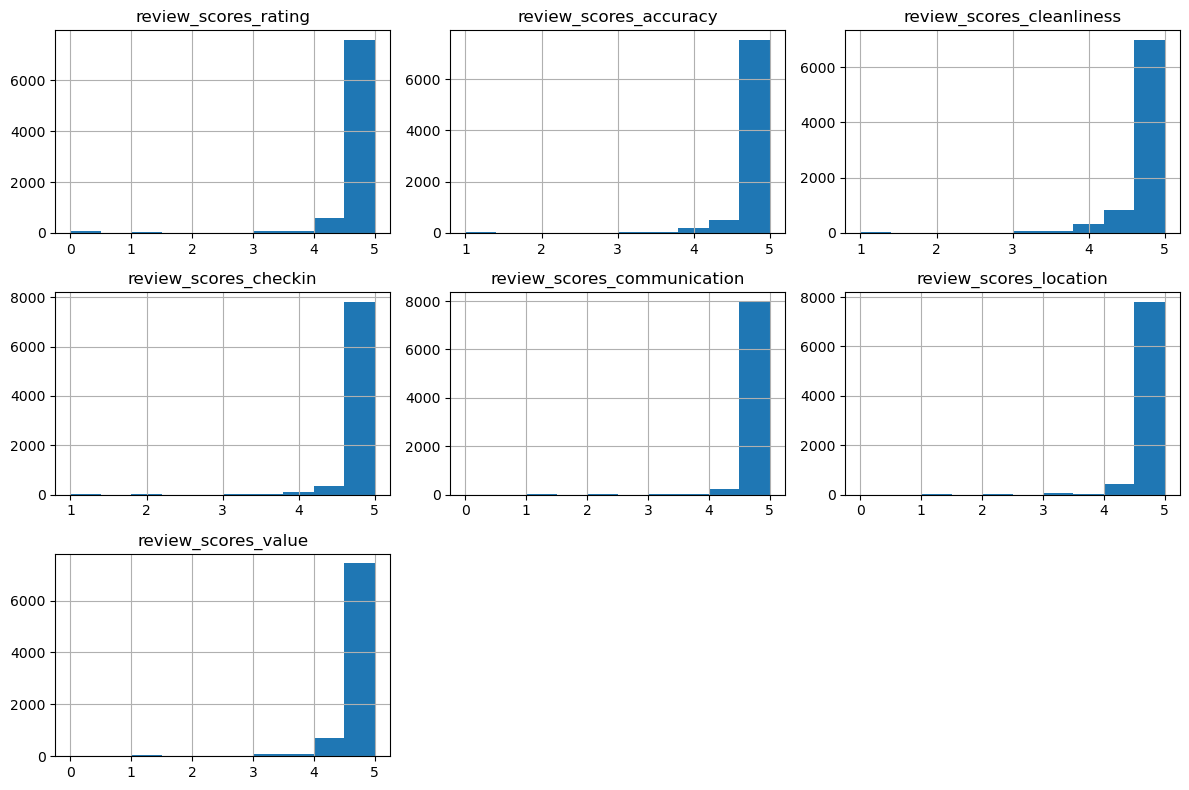

In [75]:
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    list_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Bin each of the review columns

In [76]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(list_df, col,
               bins=[0, 4, 4.5, 5],
               labels=['0-4', '4-4.5', '5'],
               na_label='no reviews')

In [77]:
list_df['review_scores_accuracy'].value_counts()

5             7655
no reviews    2887
4-4.5          407
0-4            295
Name: review_scores_accuracy, dtype: int64

##### `reviews_per_month`

Has 2k null vals so drop it, also tightly correlated with others

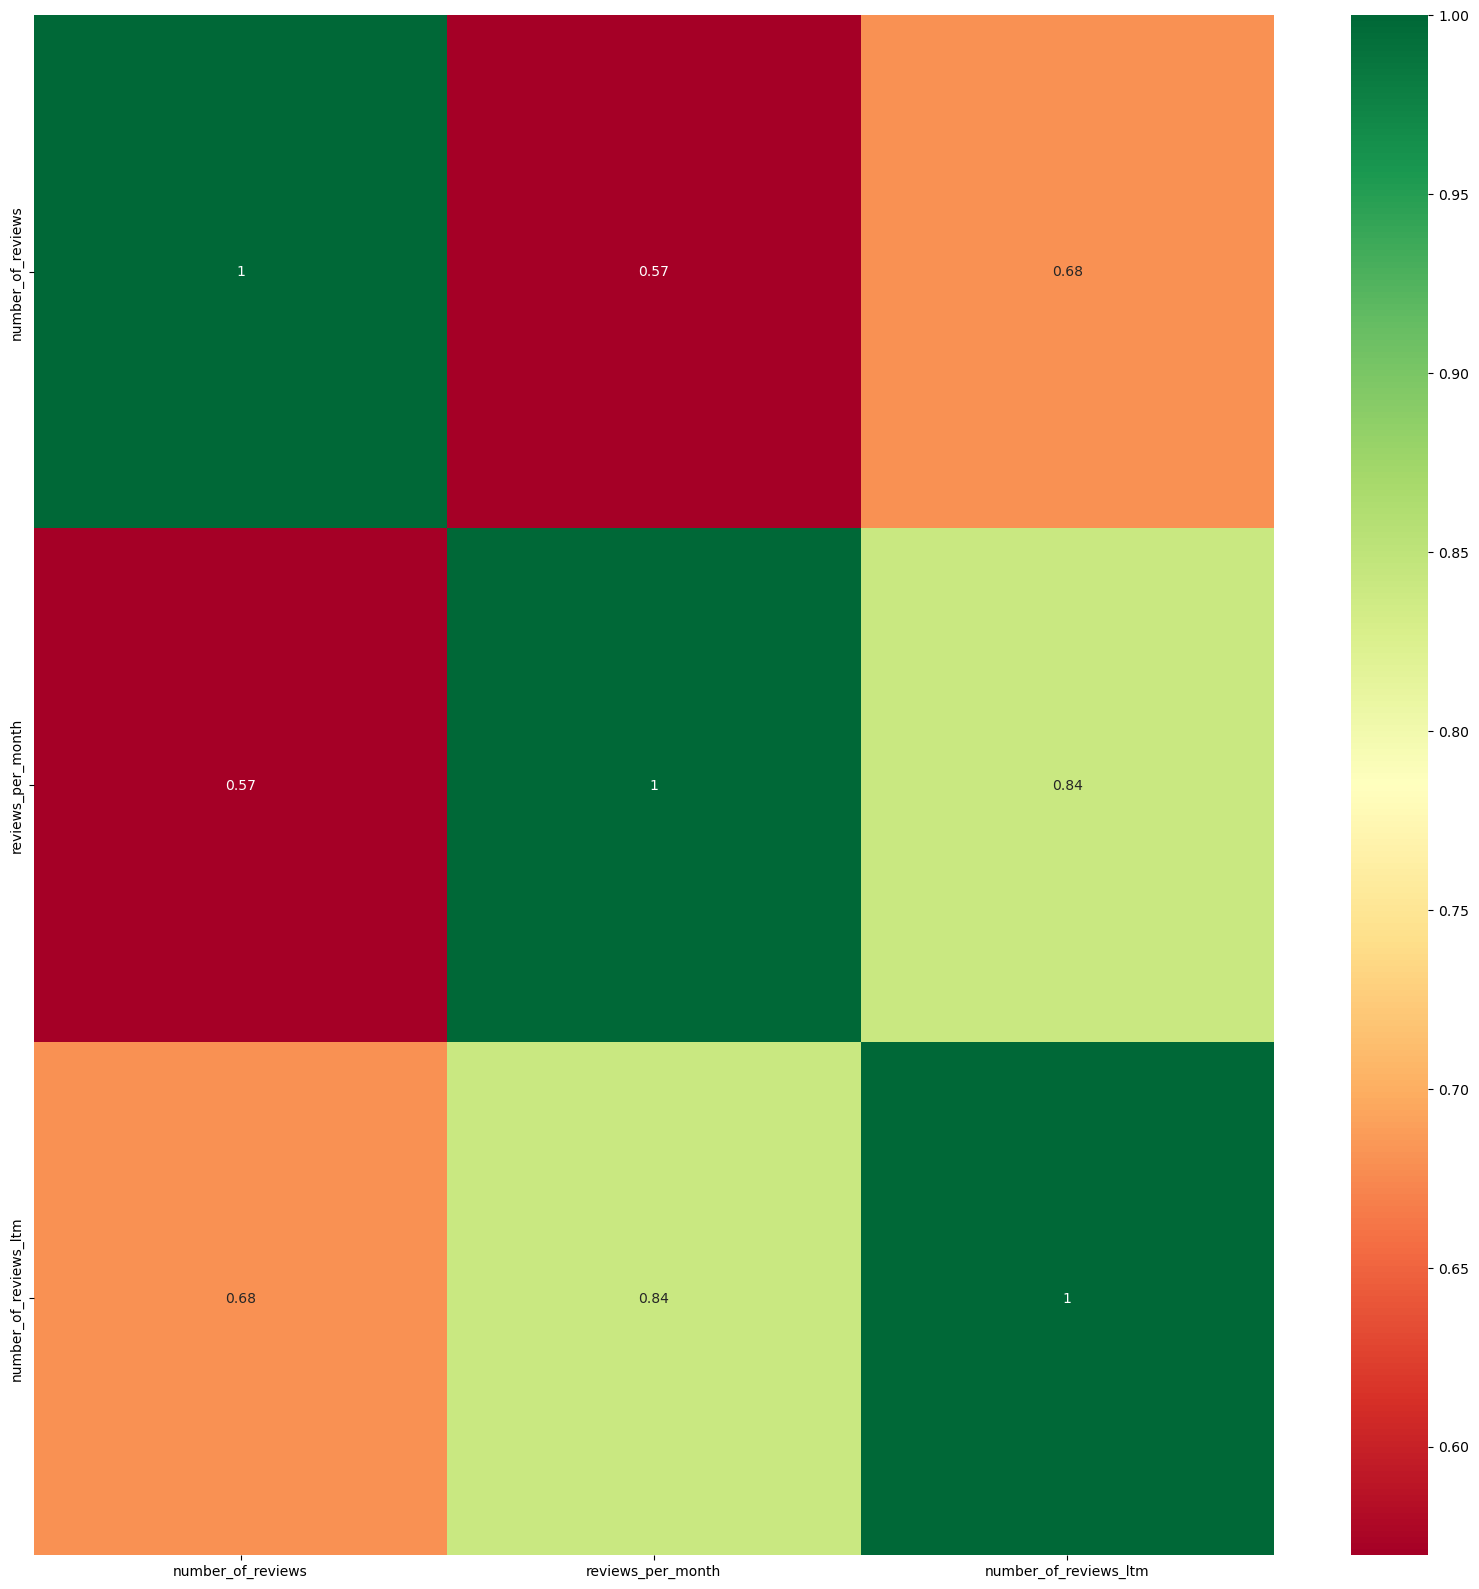

In [78]:
cols = ['number_of_reviews','reviews_per_month','number_of_reviews_ltm']

df_int = list_df[cols]
# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [79]:
list_df.drop(['reviews_per_month'], axis=1, inplace=True)

In [80]:
list_df.isnull().sum()

host_id                                            0
host_since                                         0
host_response_time                                 0
host_response_rate                              3204
host_acceptance_rate                            2644
host_is_superhost                                  0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
amenities                                     

Write cleaned CSV to folder

In [262]:
listings_cleaned = list_df.to_csv('./airbnb_data/austin/03-2022/listings_cleaned.csv', index = id, header=True)

array([[<AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'host_since'}>,
        <AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_is_superhost'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>,
        <AxesSubplot: title={'center': 'host_has_profile_pic'}>],
       [<AxesSubplot: title={'center': 'host_identity_verified'}>,
        <AxesSubplot: title={'center': 'neighbourhood_cleansed'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>],
       [<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
   

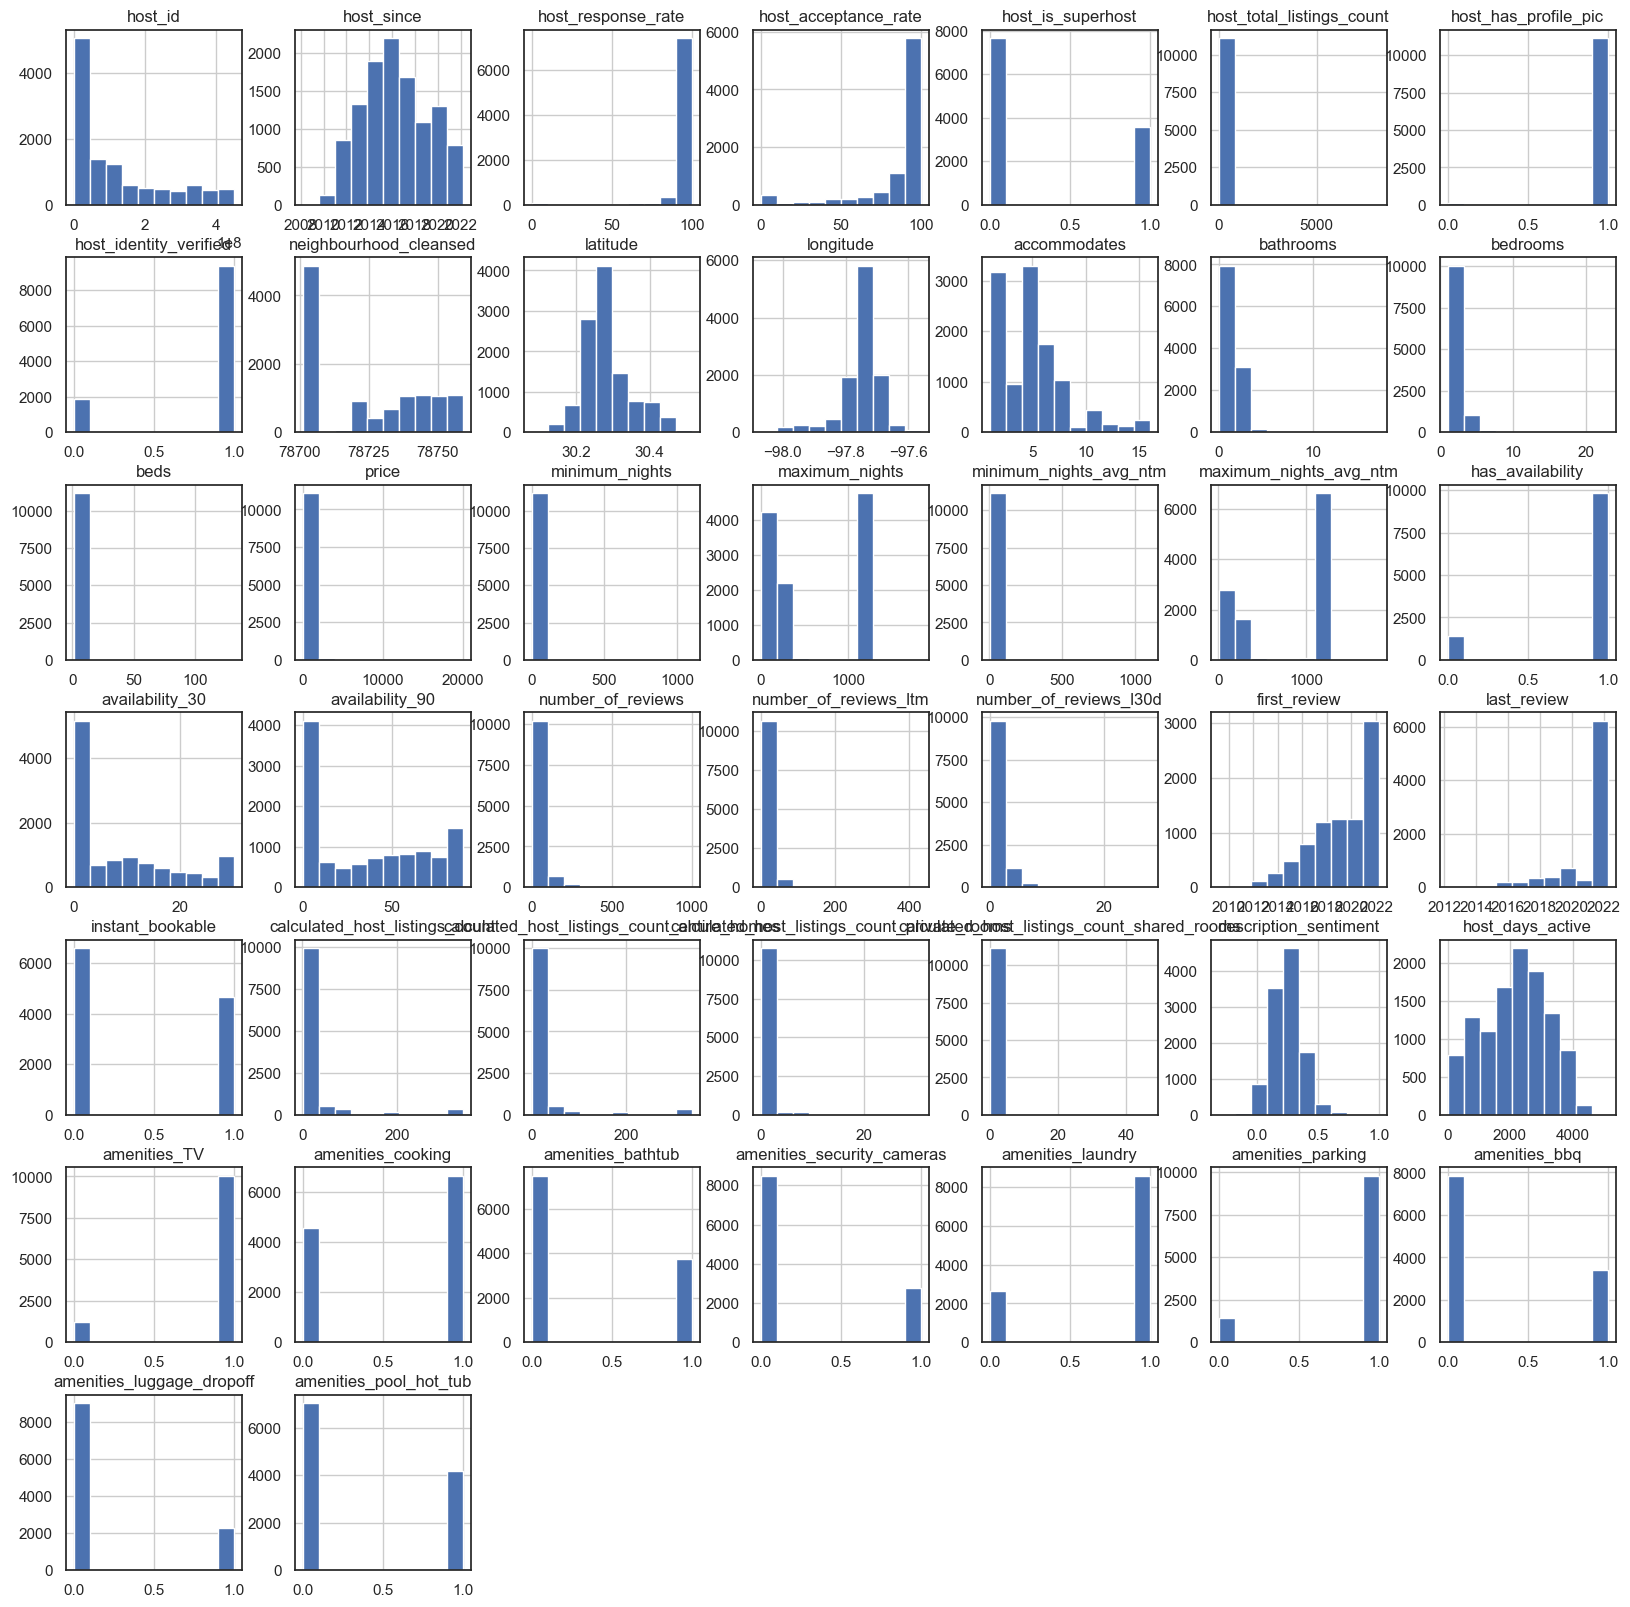

In [263]:
# Plot the numerical/boolean features
list_df.hist(figsize=(20,20))

<AxesSubplot: xlabel='description_sentiment', ylabel='Count'>

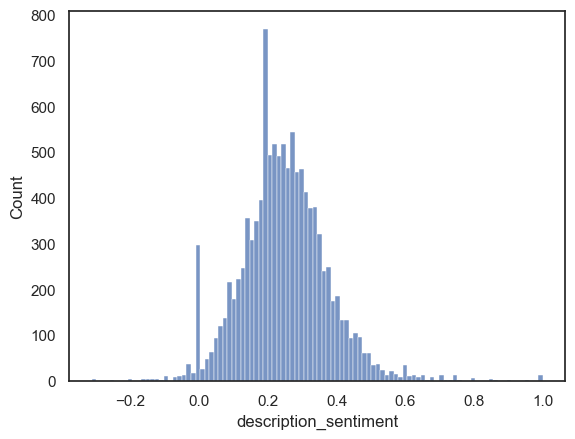

In [264]:
sns.histplot(data=list_df, x='description_sentiment')

Boolean columns that need to be cconverted to int:
- host_is_superhost
- host_identity_verified
- instant_bookable

In [178]:
list_df.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_90,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,host_response_rate_bins,host_acceptance_rate_bins,property_type_clean,amenities_TV,amenities_cooking,amenities_bathtub,amenities_security_cameras,amenities_laundry,amenities_parking,amenities_bbq,amenities_luggage_dropoff,amenities_pool_hot_tub,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5456,8028,2009-02-16,within an hour,100.0,94.0,1.0,1.0,1.0,1.0,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1.0,1.0,2.0,"[""Patio or balcony"", ""Hair dryer"", ""Security c...",240.0,2,90,2.0,90.0,1,7,44,2022-03-13,585,42,5,2009-03-08,2022-03-07,5,5,5,5,5,5,5,0,1,1,0,0,4772.0,100%,100%,Home,1,0,0,1,0,1,0,1,0,4+ years,0-2 weeks
5769,8186,2009-02-19,unknown,NaN,100.0,1.0,1.0,1.0,1.0,78729,30.45697,-97.78422,Private room in home,Private room,2,1.0,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",42.0,1,14,1.0,14.0,1,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,5,5,5,5,5,5,5,0,1,0,1,0,4769.0,unknown,unknown,Home,1,0,0,0,1,1,0,0,0,4+ years,6-12 months
6448,14156,2009-04-20,within an hour,100.0,98.0,1.0,2.0,1.0,1.0,78704,30.26034,-97.76487,Entire guesthouse,Entire home/apt,3,1.0,1.0,2.0,"[""Toaster"", ""Ceiling fan"", ""Outlet covers"", ""C...",325.0,3,365,3.0,1125.0,1,9,39,2022-03-12,268,30,3,2011-09-06,2022-03-06,5,5,5,5,5,5,5,1,1,1,0,0,4709.0,100%,100%,Home,1,1,0,0,0,1,0,1,0,4+ years,0-2 weeks
8502,25298,2009-07-11,within a day,83.0,29.0,0.0,1.0,1.0,0.0,78741,30.23466,-97.73682,Entire guest suite,Entire home/apt,2,1.0,1.0,1.0,"[""Essentials"", ""Kitchen"", ""Host greets you"", ""...",44.0,3,90,3.4,90.0,1,0,26,2022-03-13,48,2,0,2010-02-19,2021-11-13,5,4-4.5,5,5,5,5,5,0,1,1,0,0,4627.0,50-89%,50-89%,Other,0,0,0,0,0,1,0,0,0,4+ years,2-6 months
13035,50793,2009-11-02,within an hour,100.0,95.0,1.0,1.0,1.0,1.0,78702,30.26098,-97.73072,Entire residential home,Entire home/apt,3,2.0,2.0,2.0,"[""Toaster"", ""Bathtub"", ""Ceiling fan"", ""Private...",250.0,30,180,30.0,180.0,1,0,4,2022-03-13,14,2,0,2011-03-16,2022-01-31,5,5,5,5,5,5,5,0,2,2,0,0,4513.0,100%,100%,Home,1,1,1,1,1,1,0,0,0,4+ years,2-8 weeks


## Exploratory Data Analysis

<AxesSubplot: xlabel='bedrooms'>

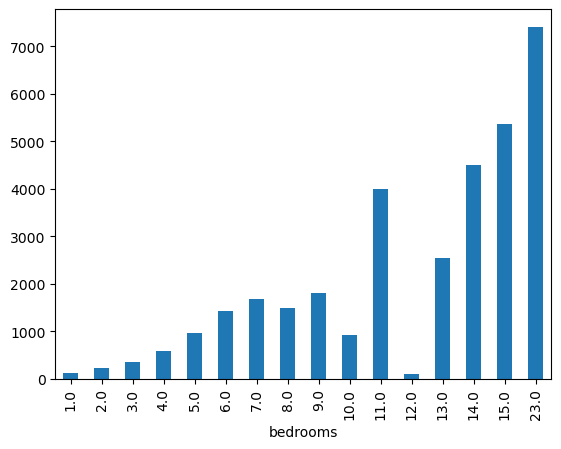

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


list_df.groupby('bedrooms').price.median().plot(kind='bar')

<AxesSubplot: xlabel='price', ylabel='Count'>

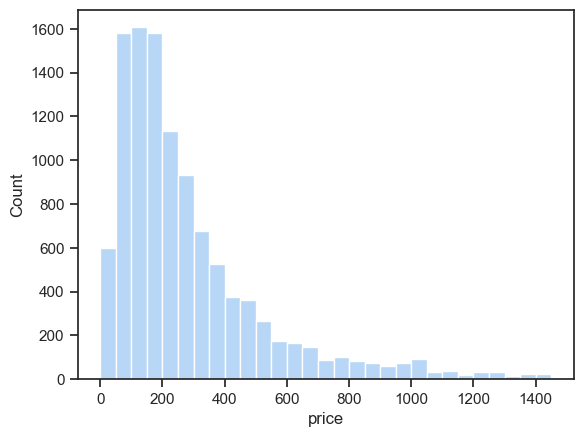

In [29]:
sns.histplot(data=list_df, x="price", bins=np.arange(0,1500,50))

<AxesSubplot: xlabel='room_type', ylabel='price'>

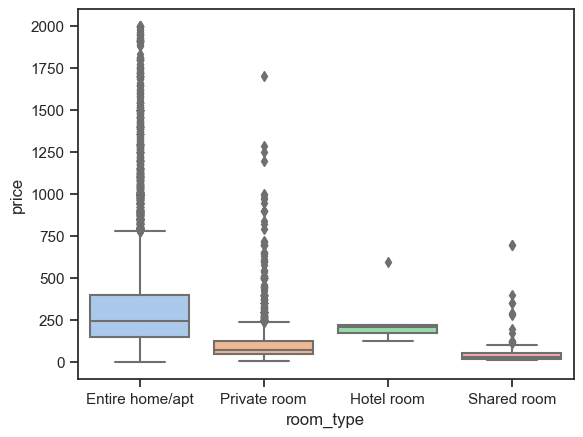

In [30]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="room_type", y="price", data=list_df[list_df['price']<2000])

In [21]:
# Load data from csv file
df = pd.read_csv('./airbnb_data/austin/03-2022/listings_cleaned_v3.csv')

In [22]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_90',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings

In [23]:
# Print column names for further reference
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_90',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings

#### Explore relationships with the hosts and their calculated listings

In [24]:
host_listings = df.groupby('host_id').agg({'host_since': lambda x: x.iloc[0], 'calculated_host_listings_count': lambda x: x.iloc[0]})
host_listings['host_since'] = pd.to_datetime(host_listings['host_since']).dt.year
host_listings['calculated_host_listings_count_log'] = np.log(host_listings['calculated_host_listings_count'])


In [25]:
host_listings['calculated_host_listings_count'].describe()

count    7020.000000
mean        1.655413
std         5.648807
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       338.000000
Name: calculated_host_listings_count, dtype: float64

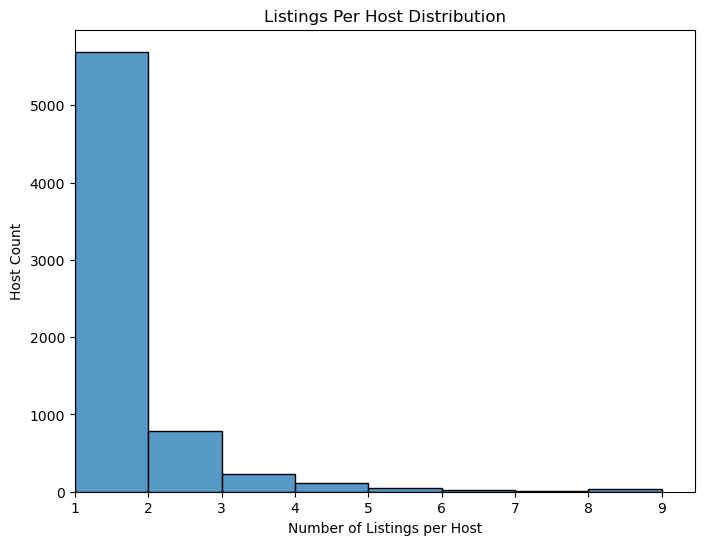

In [126]:
# Quick plot of histogram for price, zooming in on <1000
plt.figure(figsize=(8,6))
bins = np.arange(0,10,1)
ax = sns.histplot(x='calculated_host_listings_count', data=host_listings, bins = bins)
ax.set(xlabel='Number of Listings per Host', ylabel='Host Count', title="Listings Per Host Distribution")
ax.set_xlim(left=1)
plt.show()

In [58]:
host_listings['calculated_host_listings_count'].median()

1.0

Mean and median valuess of `host_listings` suggest that most listings are managed by host where that listing is the only peoperty maanged by that host on Airbnb.

In [59]:
host_listings['calculated_host_listings_count'].value_counts().sort_index().head(5)

1    5694
2     788
3     228
4     111
5      49
Name: calculated_host_listings_count, dtype: int64

In [127]:
(df['calculated_host_listings_count']==1).sum()

5694

In [122]:
host_listings['calculated_host_listings_count'].value_counts(normalize=True)

1      0.811111
2      0.112251
3      0.032479
4      0.015812
5      0.006980
6      0.003561
9      0.002137
7      0.002137
8      0.001994
12     0.001567
11     0.001282
10     0.000855
15     0.000712
18     0.000570
27     0.000570
14     0.000570
30     0.000427
38     0.000427
36     0.000285
20     0.000285
19     0.000285
17     0.000285
24     0.000285
50     0.000285
74     0.000142
338    0.000142
28     0.000142
43     0.000142
31     0.000142
51     0.000142
42     0.000142
48     0.000142
32     0.000142
78     0.000142
82     0.000142
57     0.000142
194    0.000142
13     0.000142
99     0.000142
40     0.000142
21     0.000142
22     0.000142
16     0.000142
29     0.000142
Name: calculated_host_listings_count, dtype: float64

In [115]:
host_listings['calculated_host_listings_count'].value_counts().sort_index(ascending = False).head(5)

338    1
194    1
99     1
82     1
78     1
Name: calculated_host_listings_count, dtype: int64

In [62]:
print(f" Percentage of hosts with just 1 listing in Austin: {100*(host_listings['calculated_host_listings_count'] == 1).sum() / len(host_listings):.2f}")

 Percentage of hosts with just 1 listing in Austin: 81.11


### Examining the `price` column

In [37]:
df['price'].describe()

count    11244.000000
mean       350.307364
std        579.002650
min          1.000000
25%        118.000000
50%        204.000000
75%        378.250000
max      20000.000000
Name: price, dtype: float64

In [38]:
df['price'].median()

204.0

In [41]:
df['accommodates'].mean()

4.788954108858058

In [40]:
df['accommodates'].median()

4.0

In [44]:
# Quick insight into cost of accommodation for one person
price_per_person = df['price'] / df['accommodates']

print(f"Mean Price per Person: ${price_per_person.mean():.2f}")
print(f"Median Price per Person: ${price_per_person.median():.2f}")

Mean Price per Person: 71.61
Median Price per Person: 51.77


Note that the minimum and maximum prices offered on the platform are $1 and $20,000 respectively. The distribution is also positively skewed; hence, it could benefit from a log transformation. The mean 'advertised listing price' is $350.31 while the median is $204.00. 

Compare to average hotel price for Austin: https://www.budgetyourtrip.com/united-states-of-america/austin
- Average price for one person acccomodation is $45 -> double occupancy room is $90

Observe that the median price per person is ~ $51, which is comparable (about $6 higher) than the average price for a hotel. Keep in mind that listings often have more facilities than a hotel room does.


In [51]:
vals = [100, 300, 600, 1000]

for num in vals:
    print(f"Percentage listings less than ${num}: {100*(df['price'] < num).sum()/len(df):.2f}%")

Percentage listings less than $100: 19.33%
Percentage listings less than $300: 66.04%
Percentage listings less than $600: 87.24%
Percentage listings less than $1000: 94.27%


Observe that 66% of the listings are priced less than $300 and 94% less than $1000.

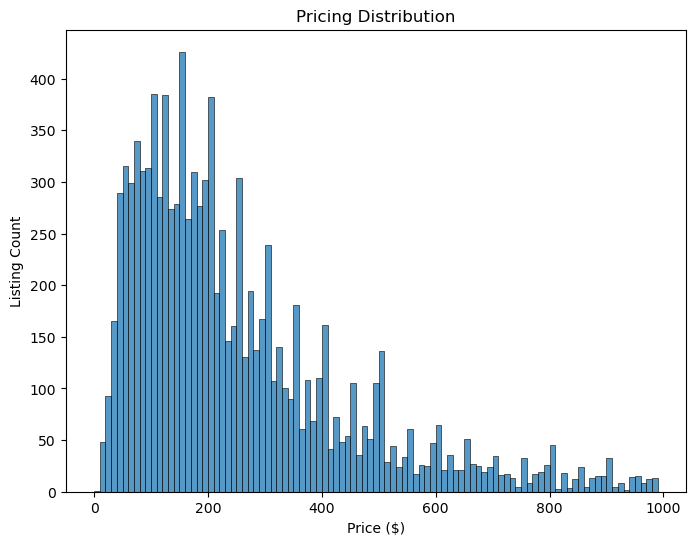

In [72]:
# Quick plot of histogram for price, zooming in on <1000
plt.figure(figsize=(8,6))
bins = np.arange(0,1000,10)
ax = sns.histplot(x='price', data=df, bins = bins)
ax.set(xlabel='Price ($)', ylabel='Listing Count', title="Pricing Distribution")
plt.show()

### Looking into occcupancy metrics 
`accommodates`, `bathrooms`,`bedrooms`, `beds`

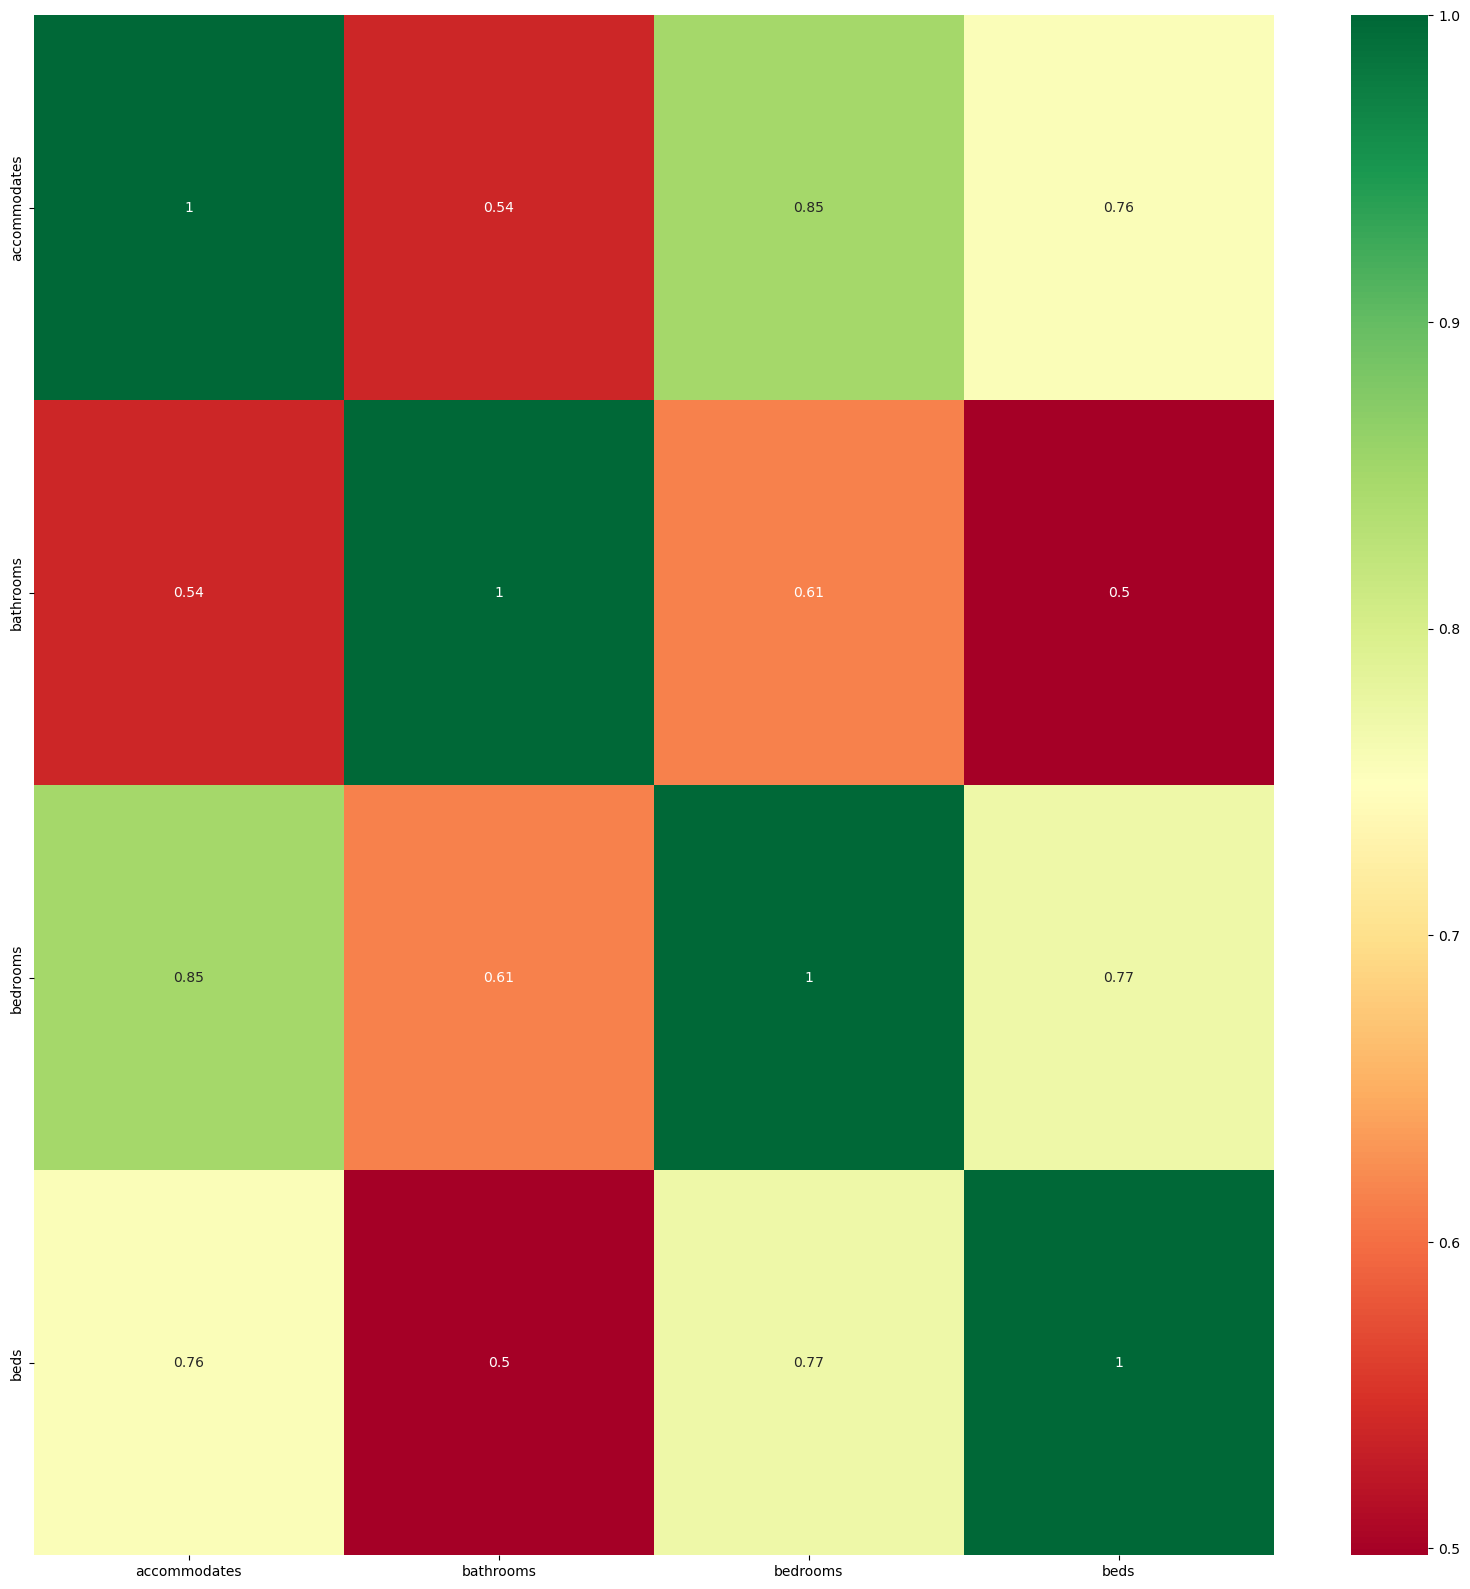

In [63]:
cols = ['accommodates', 'bathrooms','bedrooms', 'beds']
correlation = df[cols].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

Note these features are highly correlated with each other: 
- strongest correlation is between bedrooms and acccommodates (r=0.85)
- strong correlation between beds and bedrooms (r=0.77)
- strong correlation between beds and accommodates (r=0.76)

This should be considered when selecting features for modeling

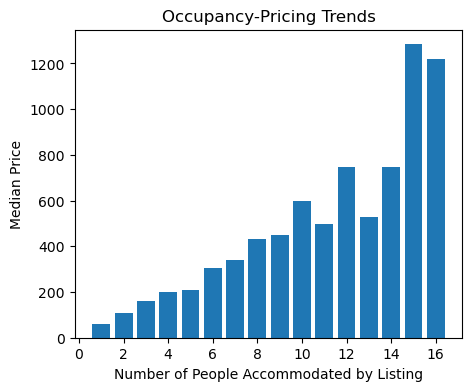

In [74]:
# Bar plot between room occupancy and median price
accomm_price = df.groupby('accommodates')['price'].median()

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(accomm_price.index, accomm_price)
ax.set(xlabel='Number of People Accommodated by Listing', ylabel='Median Price', title="Occupancy-Pricing Trends")
plt.show()

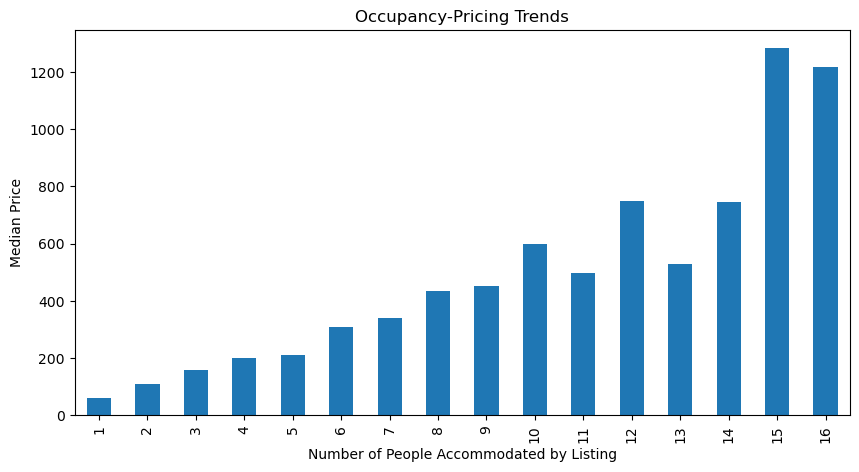

In [76]:
plt.figure(figsize=(10,5))
ax = accomm_price.plot.bar()
ax.set(xlabel='Number of People Accommodated by Listing', ylabel='Median Price', title="Occupancy-Pricing Trends")
plt.show()

Text(0.5, 0.98, 'plt.subplots()')

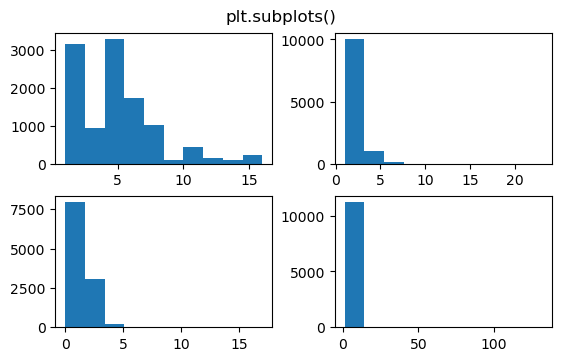

In [84]:
data = df.groupby
cols = [['accommodates','bedrooms'],['bathrooms','beds']]
titles = [['Listing Capacity','Bedrooms'],['Bathrooms','Beds']]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].hist(df[cols[row][col]],)
        ax.set(xlabel='Value', ylabel='Count', title=titles[row][col])
fig.suptitle('plt.subplots()')


### Geospatial Data Analysis

In [134]:
import geopandas as gpd

geojson_data_path = './airbnb_data/austin/neighbourhoods.geojson'

map_df = gpd.read_file('./airbnb_data/austin/neighbourhoods.geojson')

map_df.drop('neighbourhood_group', axis = 1, inplace=True)

map_df.head()

,neighbourhood,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [135]:
# Convert neighborhood cleansed to str dtype
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype(str)

In [136]:
# Aggregate number of listings and median/mean price per zip code for the listing data we have
neighborhood_df = df.groupby('neighbourhood_cleansed').agg({'id': lambda x: len(x), 'price': [np.median, np.mean]})
neighborhood_df.reset_index(inplace=True)

# Drop multi index and rename cols
neighborhood_df.columns = neighborhood_df.columns.droplevel(0)
cols = ['neighbourhood','num_listings','median_price','mean_price']
neighborhood_df.set_axis(cols, axis=1,inplace=True)

# Merge geojson geometry data with the neighbourhood data 
geo_data_merged = pd.merge(map_df, neighborhood_df, how='inner',on='neighbourhood')

/var/folders/4d/0_lvmgpj3z94tvt7zl8k29vw0000gn/T/ipykernel_95163/1799734952.py:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  neighborhood_df.set_axis(cols, axis=1,inplace=True)


In [167]:
geo_data_merged.to_csv('./test.csv')

In [134]:
type(geo_data_merged['geometry'])

geopandas.geoseries.GeoSeries

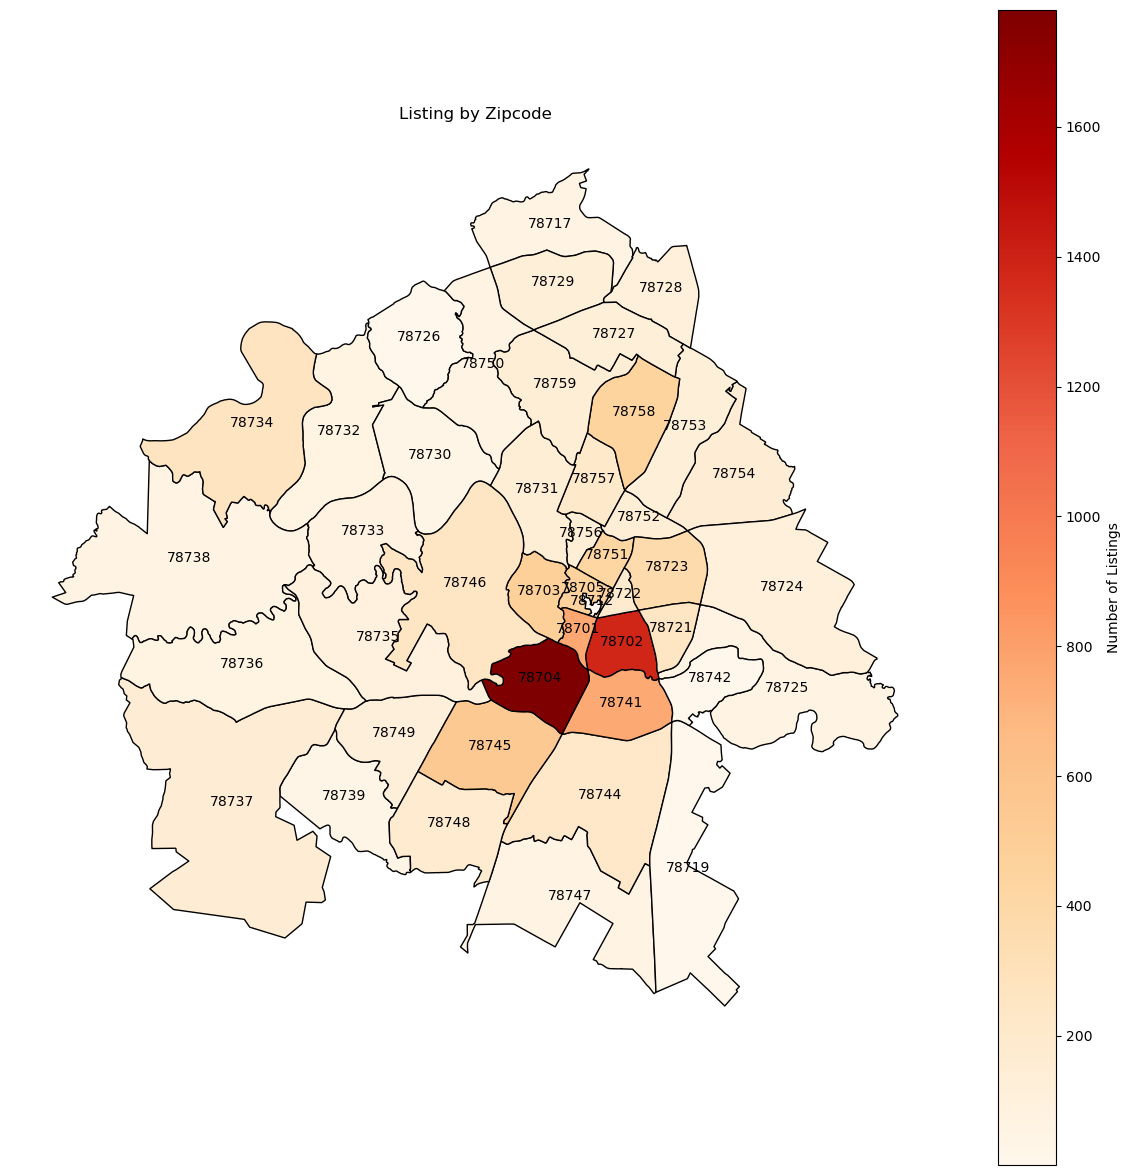

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
geo_data_merged.plot(column='num_listings',legend=True, cmap='OrRd', legend_kwds={'label': "Number of Listings"}, edgecolor='black',ax=ax)
geo_data_merged.apply(lambda x: ax.annotate(text=x['neighbourhood'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_axis_off()
ax.set(title="Listing by Zipcode")
plt.show()

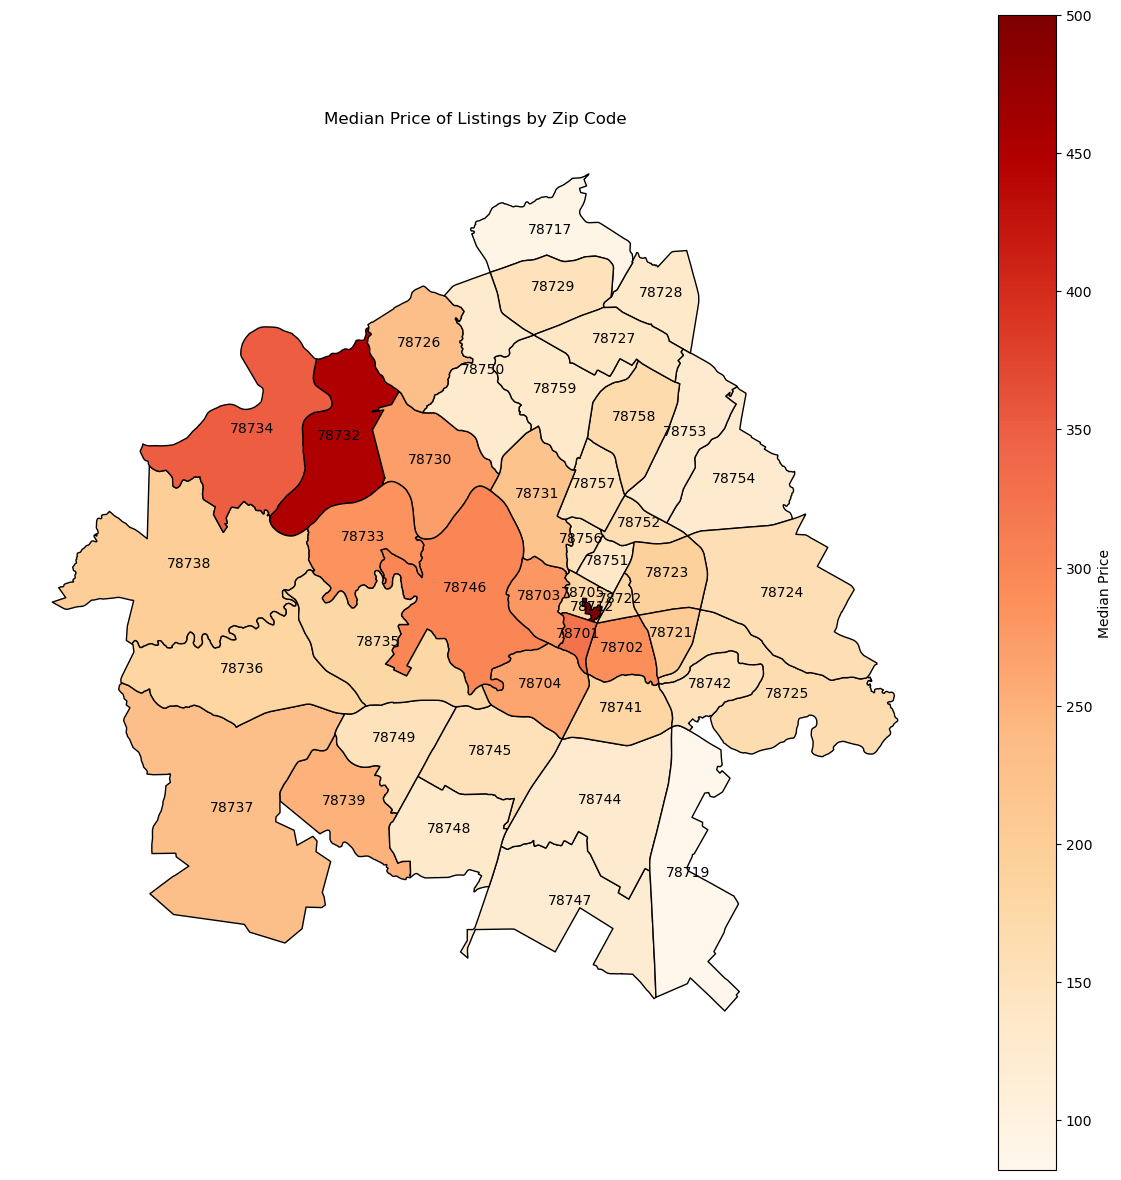

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
geo_data_merged.plot(column='median_price',legend=True, cmap='OrRd', legend_kwds={'label': "Median Price"}, edgecolor='black',ax=ax)
geo_data_merged.apply(lambda x: ax.annotate(text=x['neighbourhood'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_axis_off()
ax.set(title="Median Price of Listings by Zip Code")
plt.show()

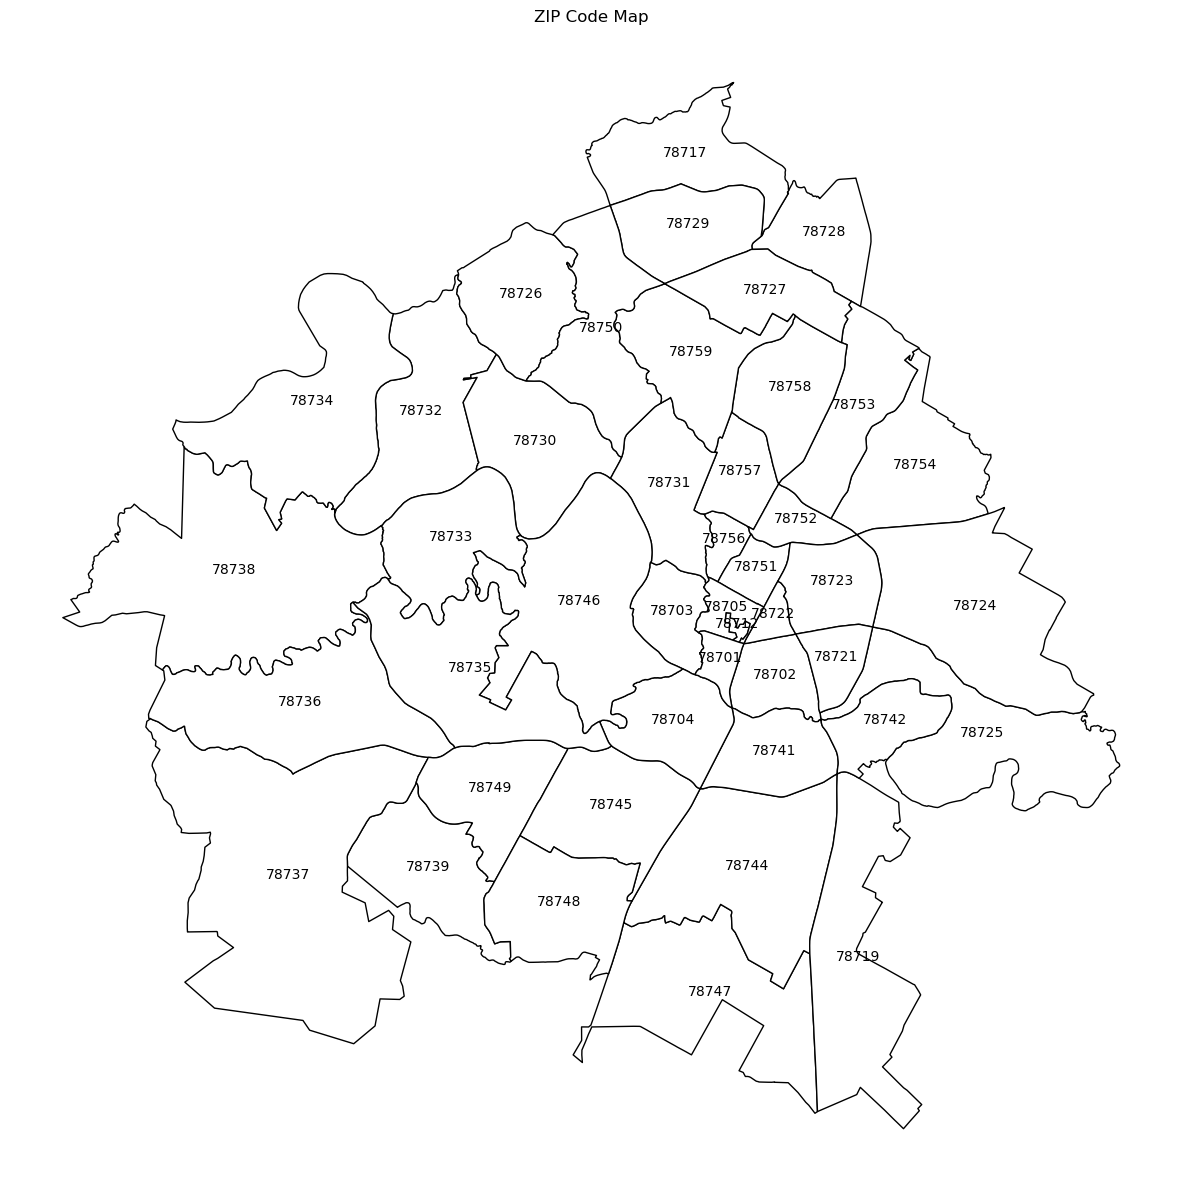

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
geo_data_merged.plot(color='white', edgecolor='black',ax=ax)
geo_data_merged.apply(lambda x: ax.annotate(text=x['neighbourhood'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_axis_off()
ax.set(title="ZIP Code Map")
plt.show()

### Property and Room Type

In [179]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_90',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings

[Text(0.5, 0, 'Room Type'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Room Type and Pricing')]

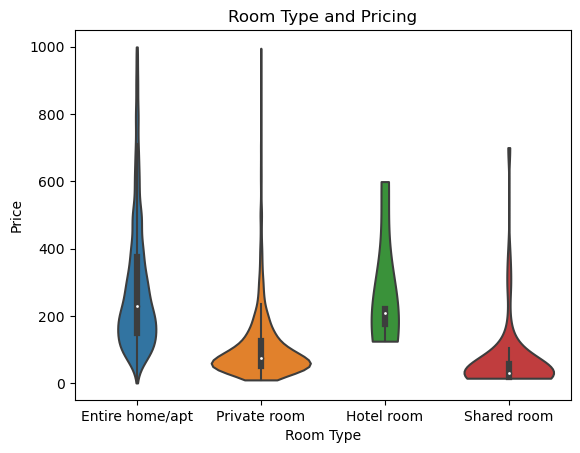

In [142]:
ax = sns.violinplot(data=df[df['price']<1000], x='room_type',y='price', cut=0)
ax.set(xlabel='Room Type', ylabel='Price', title="Room Type and Pricing")

In [183]:
df.groupby('room_type')['price'].median()

room_type
Entire home/apt    250.0
Hotel room         210.0
Private room        75.0
Shared room         30.0
Name: price, dtype: float64

In [184]:
df['room_type'].value_counts(normalize=True)

Entire home/apt    0.813767
Private room       0.175382
Shared room        0.010406
Hotel room         0.000445
Name: room_type, dtype: float64

In [185]:
df['room_type'].value_counts()

Entire home/apt    9150
Private room       1972
Shared room         117
Hotel room            5
Name: room_type, dtype: int64

In [187]:
# See how property type affects median pricing
df.groupby('property_type_clean')['price'].median()

property_type_clean
Apartment    175.0
Condo        224.5
Home         250.0
Other        155.0
Name: price, dtype: float64

### Review Data

In [143]:
df['review_scores_rating'].value_counts(normalize=True)

5             0.657684
no reviews    0.250800
4-4.5         0.054518
0-4           0.036998
Name: review_scores_rating, dtype: float64

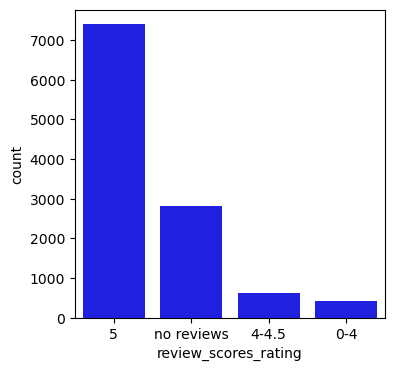

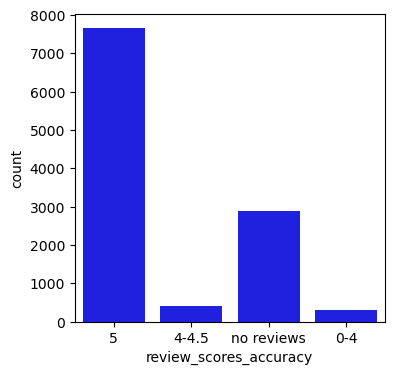

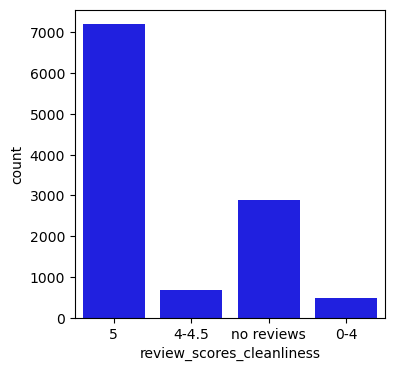

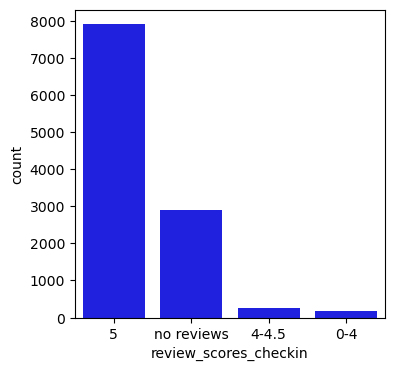

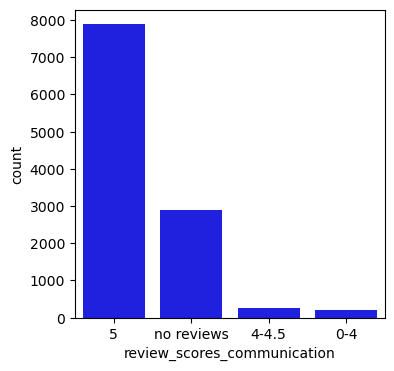

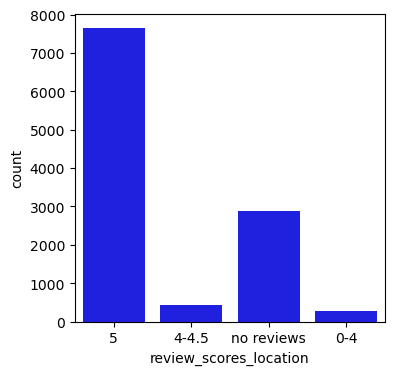

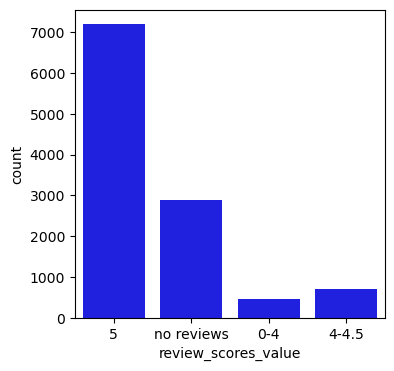

In [194]:
cols = []
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    cols.append(col)
    sns.countplot(data=df,x=col, ax=ax, color='blue')

In [191]:
df['review_scores_rating'].value_counts()

5             7395
no reviews    2820
4-4.5          613
0-4            416
Name: review_scores_rating, dtype: int64